# NBA Prospect Three-Point Shooting Predictor

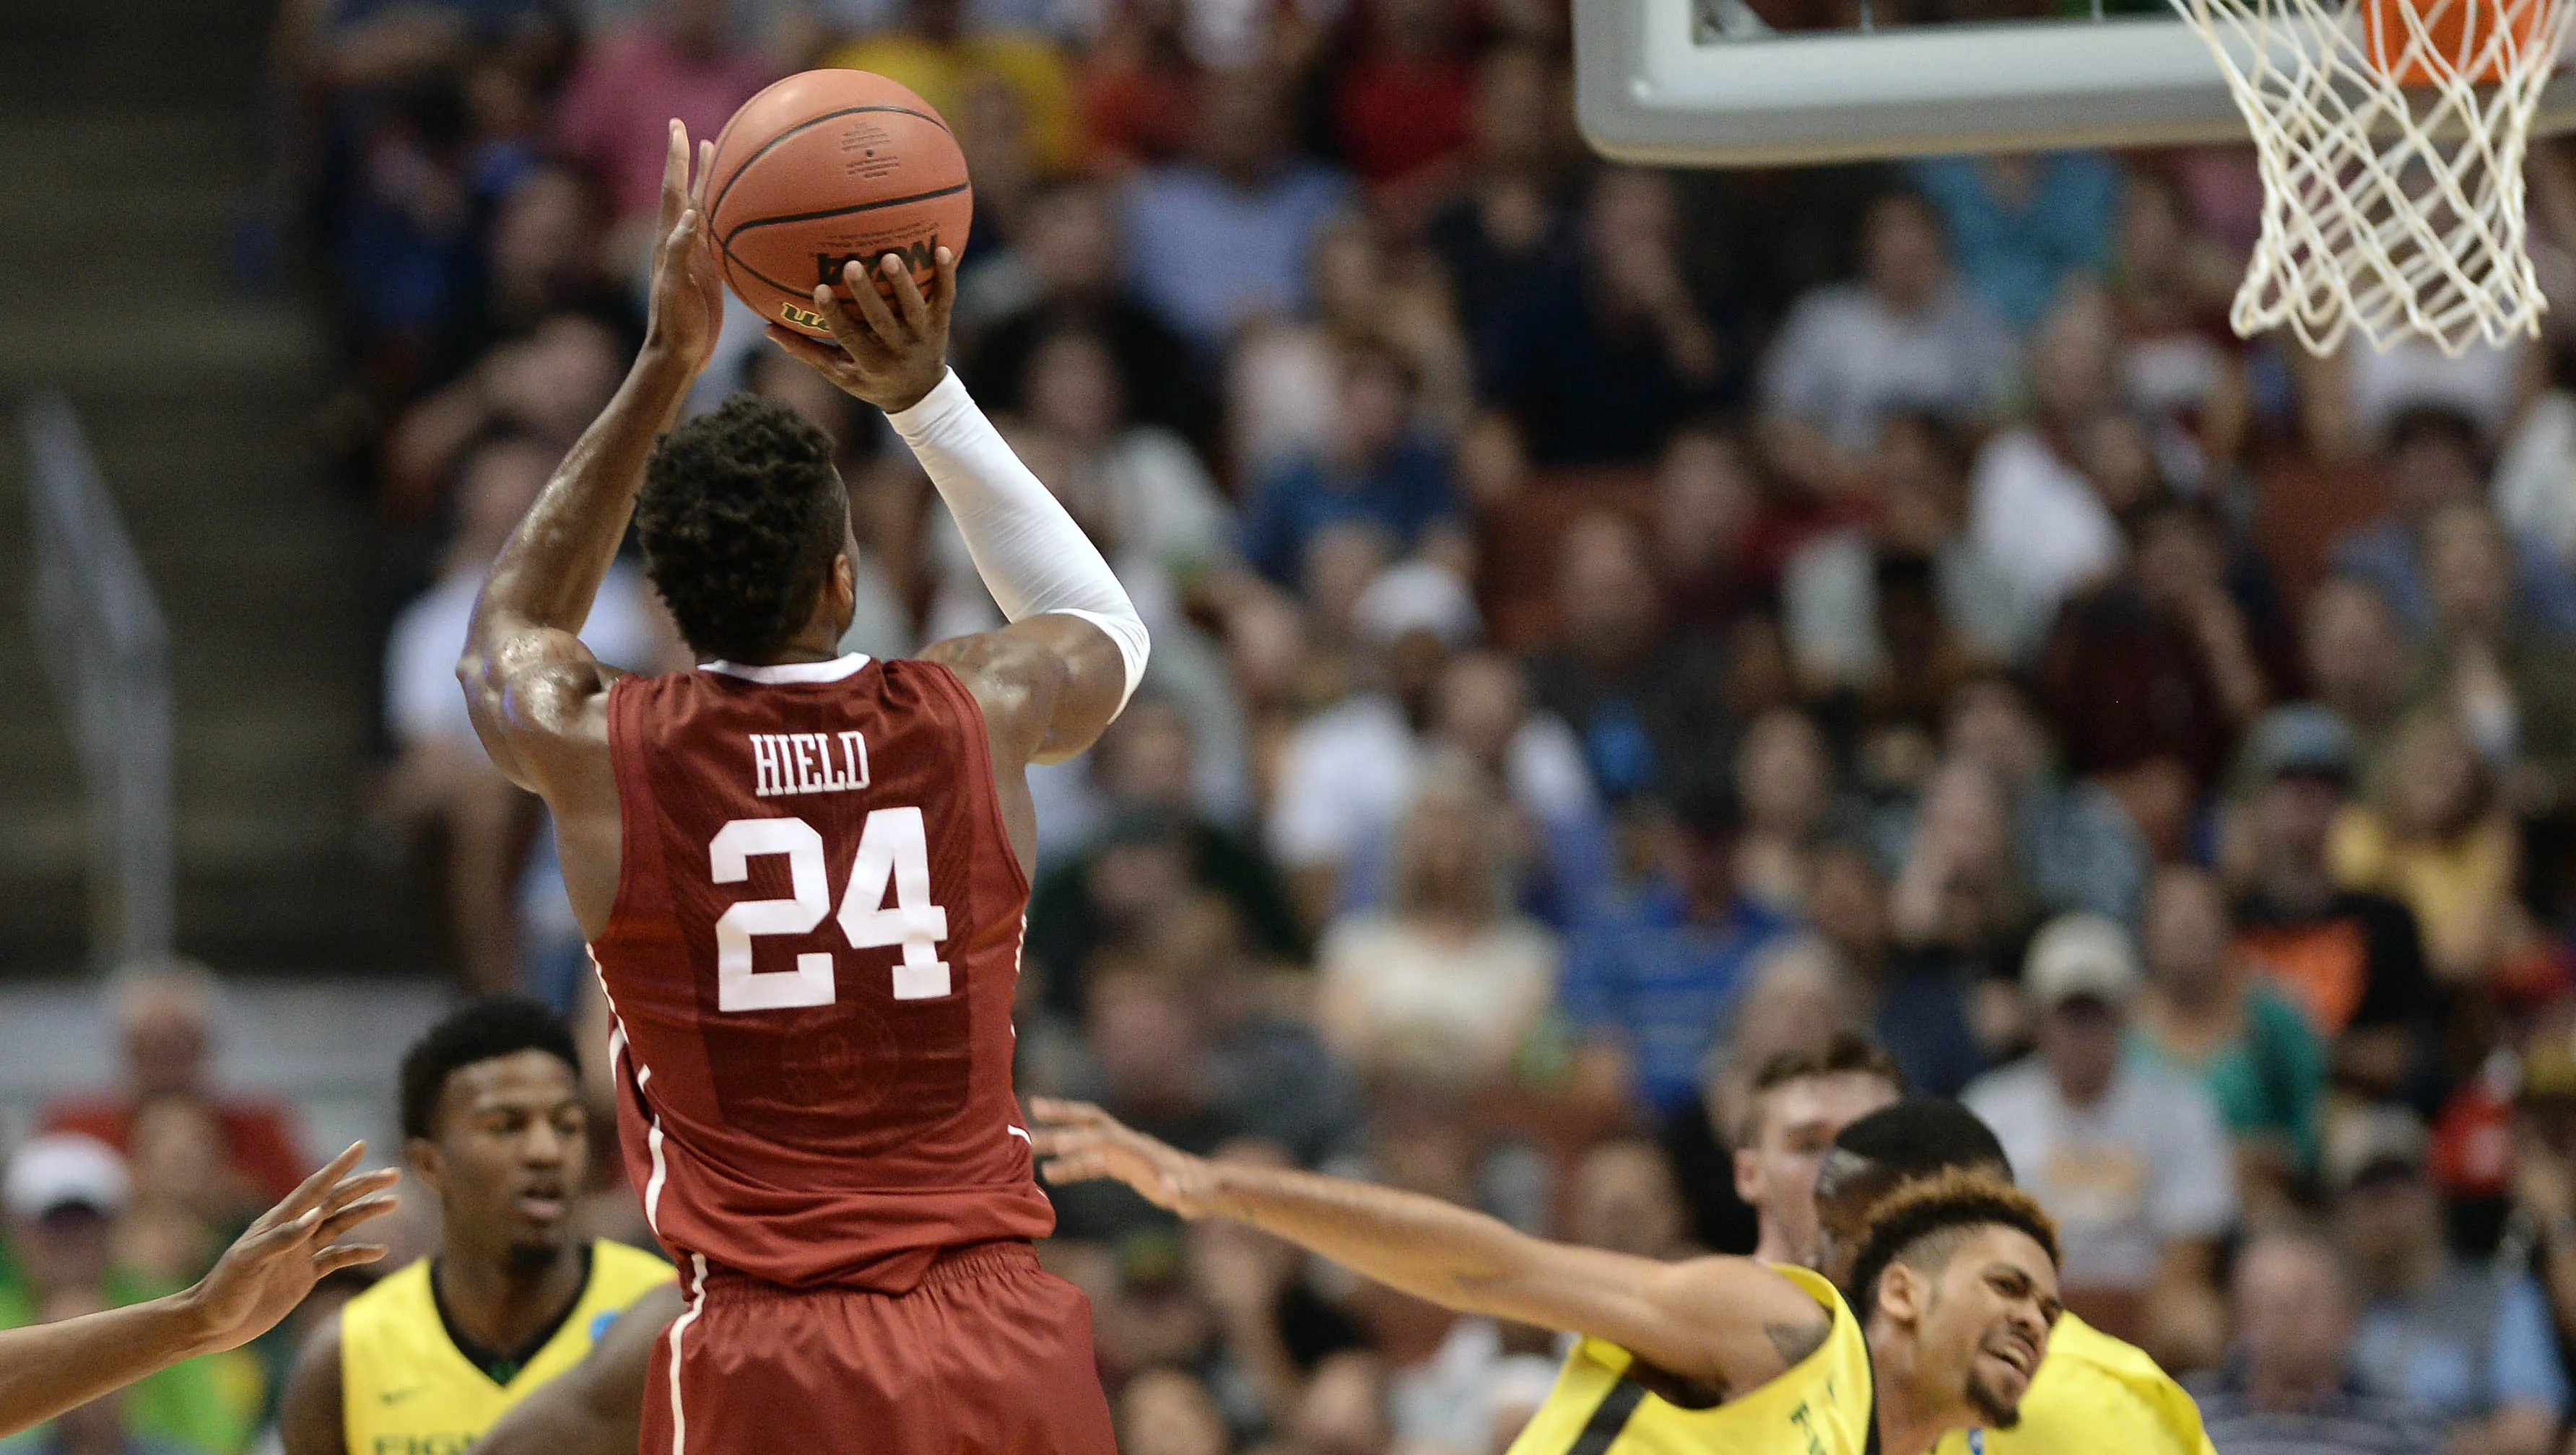

## Business Understanding

#### The Evolution of the NBA and the Rise of Three-Point Shooting

In the modern NBA, the emphasis on three-point shooting has dramatically reshaped the game, altering team strategies and player development. This evolution has elevated the importance of proficiency in three-point shooting to an essential skill for players across all positions. Being adept at long-range shooting is now a critical factor in a player's career, influencing their ability to secure a spot on a team and potentially impacting their market value. As a result, NBA teams are increasingly focusing on developing this skill in their players, leveraging targeted training and analytics to enhance shooting effectiveness. A player's capability to consistently make three-point shots can significantly boost their importance to a team, affecting decisions related to drafts, trades, and contracts. In this era, a player's success in three-point shooting can be a key determinant of their career trajectory, highlighting the significant role of long-range shooting in the contemporary NBA.

#### Challenges in Evaluating Three-Point Shooting Talent

As the NBA's emphasis on three-point shooting continues to grow, its impact on the draft and scouting processes has become increasingly significant. The ability of a prospect to shoot from long range is now a major factor in their overall evaluation, influencing how teams perceive their potential and future success in the league. However, accurately projecting a college player's three-point shooting ability to the NBA level is a challenging aspect of scouting. This difficulty arises because players' performances can vary widely once they transition from college basketball to the professional stage. Some players may significantly improve their shooting due to advanced training methods and a focus on skill development, while others may struggle to replicate their college success or fail to develop their shooting abilities further.

A key issue in this scouting dilemma is the relatively small sample size of three-point shooting attempts in college, which can lead to unstable and misleading percentages. College players often have shorter seasons and fewer games compared to the NBA, resulting in less data to analyze and a higher chance of variability in their shooting performance. This makes it hard for scouts and teams to confidently predict which players will continue to excel as three-point shooters, who will improve with time and training, and who might not transition their shooting skills effectively to the professional level. Despite the critical role of three-point shooting in determining a player's impact in the NBA, the unpredictability of shooting development post-college remains a significant challenge for teams looking to draft prospects with the potential to excel in today's game.

#### Predictive Modeling: A Solution to Three-Point Shooting Evaluation

Given the challenging and often unpredictable nature of assessing college prospects' three-point shooting capabilities for the NBA, this project aims to leverage predictive modeling and machine learning techniques to forecast a player's three-point shooting performance at the professional level. By utilizing a comprehensive dataset of college statistics from current NBA players, with their NBA three-point shooting percentages serving as the target variable, this approach seeks to identify patterns and predictors that may not be immediately apparent through traditional scouting methods.

The rationale behind employing predictive modeling lies in the inherent randomness and difficulty associated with evaluating three-point shooting potential. NBA front offices could greatly benefit from a methodology that offers a more accurate prediction of a prospect's ability to shoot from long range, based solely on statistical analysis. This would allow teams to allocate their scouting resources and attention more efficiently, focusing on assessing other aspects of a player's game that are less random and more observable through traditional evaluation methods, such as defensive skills and playmaking abilities.

By redirecting the focus away from the highly variable task of projecting three-point shooting potential—which has proven to be a complex and sometimes misleading aspect of player evaluation—teams can instead prioritize the scouting of skills and attributes that lend themselves to more consistent and qualitative analysis. This strategic shift in talent evaluation emphasizes the development and recognition of well-rounded players, while still acknowledging the critical role that three-point shooting plays in the modern NBA. Through this project, we aim to provide NBA front offices with a tool that enhances their ability to predict three-point shooting success, optimizing the draft and development process by using data-driven insights to complement traditional scouting expertise.



## Data Understanding

In this project, I aim to predict the NBA three-point shooting percentages of college basketball prospects. To achieve this, I have sourced and combined comprehensive datasets that encompass both NCAA player statistics and NBA player three-point shooting statistics. Understanding the structure, content, and quality of this data is crucial for my analysis and subsequent predictive modeling.

#### NCAA Player Statistics

The dataset for [NCAA player statistics was downloaded from BartTorvik.com](https://barttorvik.com/playerstat.php?link=y&year=2024&start=20231101&end=20240501), covering every NCAA season from 2007-08 to 2021-22. This dataset includes a wide range of player statistics, such as points per game, assists, rebounds, and, critically for my project, three-point shooting percentages. After downloading the CSV files for each season, they were merged into a single CSV file to create a comprehensive dataset. This consolidation process was essential for analyzing trends over time and ensuring a robust sample size for our predictive models. Importing this combined dataset into a Pandas DataFrame allows for efficient data manipulation and analysis within a Python environment.

#### NBA Player Three-Point Shooting Statistics

For the NBA player statistics, I focused on three-point shooting data from the regular seasons spanning from 2008-09 through the current season, as I only had access to college player data beginning in the 2007-08 season. This data was [sourced from Stathead.com](https://stathead.com/basketball/player-season-finder.cgi), specifically selecting players with a minimum of 82 games played to ensure I am considering only those with a significant amount of playtime and excluding rookies, thereby improving the reliability of the three-point percentage as a metric. This dataset provides a critical linkage to the NCAA dataset, as it enables us to compare college performance with professional outcomes, focusing on the aspect of three-point shooting. Most of the statistics in this data set will be Per 100 possessions, as we will need this to update the target variable, as I will explain in detail in the Data Cleaning section.

#### Caveats and Considerations
An important caveat of this project is the exclusion of international prospects and players from the G-League Ignite who are increasingly making up a significant portion of NBA draft picks each season. This exclusion is due to the unavailability of comparable and consistent data for these groups that align with the NCAA dataset. This limitation means the predictive model may not fully capture the broader spectrum of talent entering the NBA, as the pathways for developing basketball players continue to diversify beyond traditional college basketball.

In [90]:
#Importing pandas 

import pandas as pd

In [91]:
#Reading in my NCAA Player Data to pandas

ncaa_df = pd.read_csv('Data/college_player_barttorvik_stats.csv')

/var/folders/xf/v57vst_15dj4zfhxbmdlrdmm0000gn/T/ipykernel_11379/1978910493.py:3: DtypeWarning: Columns (27,64) have mixed types. Specify dtype option on import or set low_memory=False.
  ncaa_df = pd.read_csv('Data/college_player_barttorvik_stats.csv')


In [92]:
ncaa_df.head()

Player              Team Conference  GP   MPG   ORtg   USG  \
0  Jalen Coleman-Lands            Kansas        B12  39  19.8  113.0  19.6   
1          K.J. Walton             Akron        MAC   4   5.9   90.9  20.3   
2       Camron Justice  Western Kentucky       CUSA  28  76.5  105.7  23.5   
3         Traci Carter          Hartford         AE  22  51.2   91.1  22.4   
4      Shaheed Medlock            DePaul         BE   4   0.6    0.0   0.0   

   eFG%    TS%  ORB%  ...    DG_BPM  OREB_PG  DREB_PG  REB_PG  AST_PG  STL_PG  \
0  60.6  61.75   4.2  ...  0.763975   0.2821   0.4615  0.7436  0.3333  0.1795   
1  58.8  59.77   5.0  ...  1.126700   1.1667   2.0000  3.1667  1.3333  1.3333   
2  53.5  57.00   0.5  ... -0.657743   0.1333   3.2333  3.3667  3.2000  1.6000   
3  43.2  46.06   2.2  ... -0.421078   0.5455   3.3636  3.9091  2.7727  1.6364   
4   0.0   0.00   0.0  ... -1.273520   0.0000   0.5000  0.5000  0.0000  0.0000   

   BLK_PG   PTS_PG  Position_Advanced   3PT/100  
0  0.1026   3.6923             Wing G  12.06140  
1  0.0000   7.3333             Wing G   0.00000  
2  0.0667  14.7333            Combo G  11.95290  
3  0.4545   9.6364         Scoring PG   9.25142  
4  0.0000   0.0000               PF/C   0.00000  

[5 rows x 66 columns]

In [93]:
#Reading in my NBA Player Data to pandas

nba_df = pd.read_csv('Data/nba_career_stats_threepoint_analysis.csv')

In [94]:
nba_df.head()

Player  3PA    G     From       To    Age  G.1   GS  AS   FG  \
0      Alex Abrines  595  174  2016-17  2018-19  23-25  174   16   0  5.4   
1  Precious Achiuwa  325  231  2020-21  2023-24  21-24  231   47   0  8.0   
2        Quincy Acy  523  337  2012-13  2018-19  22-28  337   60   0  5.4   
3      Steven Adams   15  706  2013-14  2022-23  20-29  706  641   0  7.0   
4       Bam Adebayo   73  456  2017-18  2023-24  20-26  456  352   2  9.7   

   ...   PF   PTS    FG%    2P%    3P%    FT%    TS%   eFG%  Pos  \
0  ...  5.1  16.2  0.387  0.443  0.368  0.880  0.552  0.525  G-F   
1  ...  4.7  20.0  0.473  0.519  0.308  0.604  0.526  0.507    F   
2  ...  6.2  15.2  0.444  0.506  0.350  0.759  0.553  0.513  F-C   
3  ...  4.5  16.7  0.587  0.589  0.067  0.536  0.591  0.587    C   
4  ...  4.2  25.2  0.547  0.554  0.123  0.758  0.599  0.548  C-F   

                      Team  
0                      OKC  
1              MIA,NYK,TOR  
2  BRK,DAL,NYK,PHO,SAC,TOR  
3              MEM,NOP,OKC  
4                      MIA  

[5 rows x 34 columns]

## Data Cleaning

### Target Engineering

When assessing NBA three-point shooting skill, it's crucial to recognize that not all three-point shots are created equal. A simple three-point shooting percentage, while useful, doesn't fully capture a player's shooting ability. This metric can be misleading, as it doesn't account for the context in which shots are taken. Players who only attempt three-pointers when wide open may have inflated percentages compared to those who frequently shoot under more challenging conditions.

To address this discrepancy and create a more nuanced target variable for our predictive modeling, I have refined the traditional three-point shooting percentage. Our engineered target metric adjusts a player's three-point percentage by considering the volume of three-pointers attempted per 100 possessions. This adjustment acknowledges that players who shoot more often are likely taking harder shots, thus providing a better indicator of true shooting skill.

Additionally, we've introduced a slight adjustment factor based on the total number of three-point attempts a player has made over their career. This factor is rooted in the principle that a larger sample size of shot attempts offers a more stable and reliable measure of a player's three-point shooting talent. It accounts for the variability and noise in shooting percentages, especially in cases where players have fewer attempts. Essentially, our engineered target variable aims to balance percentage accuracy with shot difficulty and confidence in a player's shooting ability derived from their attempt volume.

This methodological refinement ensures that our predictive model considers not just how accurately players shoot from beyond the arc, but also the context of their shooting—leading to a more accurate assessment of three-point shooting skill in the NBA.

##### Step 1: Volume-Adjustment based on League-Average Three-Point Attempts per 100 Offensive Possesions


In the first step to refine the target variable for predicting NBA three-point shooting skill, the dataset nba_player_df was enhanced with a new feature named Weighting Factor. This factor is calculated by dividing each player's three-point attempts per game (3PA_PG) by the average number of three-point attempts per 100 possessions across all players (average_3pa_per_100). This step aims to quantify the relative volume of three-point shots a player takes in the context of their team's offensive possesions.

Following this, a Volume-Adjusted 3P% was introduced, leveraging the previously calculated Weighting Factor. This new metric adjusts a player's three-point shooting percentage (3P%) by scaling it according to their Weighting Factor, incorporating an adjustment coefficient (alpha = .33). The adjustment essentially amplifies or reduces the original shooting percentage based on whether a player shoots more or less frequently than the average, with the intent of acknowledging the difficulty and frequency of shots taken. This approach offers a nuanced perspective on three-point shooting skill, emphasizing not just accuracy, but also the shot selection and challenges faced by players.





In [95]:
#Seeing which columns we will need

nba_df.columns

Index(['Player', '3PA', 'G', 'From', 'To', 'Age', 'G.1', 'GS', 'AS', 'FG',
       'FGA', '2P', '2PA', '3P', '3PA.1', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%',
       'TS%', 'eFG%', 'Pos', 'Team'],
      dtype='object')

In [96]:
nba_df[['3PA','3PA.1']].describe()

#Based on the numbers, 3PA column is career attempts, while 3PA.1 is Attempts Per 100 Possessions

3PA       3PA.1
count   942.000000  942.000000
mean   1005.237792    5.671550
std    1121.519145    3.141139
min      10.000000    0.000000
25%     217.250000    3.400000
50%     583.500000    5.900000
75%    1478.500000    8.000000
max    8406.000000   14.700000

In [97]:
#Rename the columns accordingly

nba_df.rename(columns={'3PA': '3PA_Career'}, inplace=True)

nba_df.rename(columns={'3PA.1': '3PA_100'}, inplace=True)

In [98]:
#Getting the average 3PA Per 100 Possessions based on the Players in our data set
#We will use this to calculate volume-adjusted 3P%

average_3pa_per_100 = nba_df['3PA_100'].mean()

average_3pa_per_100

5.671549893842887

In [99]:
#Calculating volume-adjusted 3P%

nba_df['Weighting Factor'] = nba_df['3PA_100'] / average_3pa_per_100

alpha = .33  

nba_df['Volume-Adjusted 3P%'] = nba_df['3P%'] * (1 + alpha * (nba_df['Weighting Factor'] - 1))

In [100]:
# Now I will look at the top 20 players in pure 3P% compared to the top 20 players in Volume-Adjusted 3P%

top20_column1 = nba_df[['Player', '3P%', '3PA_100', '3PA_Career']].sort_values(by='3P%', ascending=False).head(20)

top20_column2 = nba_df[['Player', 'Volume-Adjusted 3P%', '3PA_100',  '3PA_Career']].sort_values(by='Volume-Adjusted 3P%', ascending=False).head(20)

#Reset index for neat printing
top20_column1.reset_index(drop=True, inplace=True)
top20_column2.reset_index(drop=True, inplace=True)

print("Top 20 for Column1:\n", top20_column1)
print("\nTop 20 for Column2:\n", top20_column2)

Top 20 for Column1:
                 Player    3P%  3PA_100  3PA_Career
0         Tony Bradley  0.500      0.3          12
1          Kyle Korver  0.439      9.4        3909
2     Kelenna Azubuike  0.438      4.5         240
3         Luke Kennard  0.437      9.5        1695
4           Joe Harris  0.436      9.2        2353
5           Seth Curry  0.432      8.7        1973
6          Steve Novak  0.430     12.4        1227
7        Stephen Curry  0.426     12.9        8406
8          Matt Bonner  0.423      8.2        1357
9           Sam Hauser  0.418     12.6         643
10          Steve Nash  0.418      4.6        1037
11      Anthony Morrow  0.417      8.0        1937
12        Desmond Bane  0.417     10.5        1521
13         J.J. Redick  0.415      9.9        4563
14         Mike Miller  0.415      6.6        1209
15       Klay Thompson  0.414     11.2        5689
16       José Calderón  0.413      5.6        1958
17  Zydrunas Ilgauskas  0.413      0.8          63
18  Michae

Drawing on domain knowledge, the Volume-Adjusted 3P% metric emerges as a superior indicator of three-point shooting prowess. For instance, Stephen Curry, widely acknowledged as the greatest three-point shooter in history, ascends from 8th place based on traditional 3P% to the top position when considering Volume-Adjusted 3P%. Conversely, Tony Bradley, who leads in three-point percentage, experiences a significant drop in the rankings due to his low rate of 0.3 three-point attempts per 100 possessions. Bradley, primarily a center who rarely shoots from beyond the arc, has only attempted 12 three-pointers in his career, suggesting that his 50% success rate is more likely a result of small sample variance rather than genuine shooting prowess. Another notable example is Kelenna Azubuike, recognized as a proficient three-point shooter but not among the elite. While he ranks fourth in traditional 3P%, his position drops out of the Top 20 in Volume-Adjusted 3P% due to taking only 4.5 three-point shots per 100 possessions throughout his career. This adjustment reflects a more nuanced understanding of a player's ability to shoot three-pointers, accounting for both accuracy and the difficulty level of the shots attempted.

##### Step 2: Adding a Career Volume Adjustment Factor

As mentioned, I will also introduce an adjustment factor considering a player's career three-point attempts (3PA_Career). I first calculated the median of all players' 3PA_Career as our average benchmark. Then, I defined a slight adjustment factor (0.001) to modify each player's volume-adjusted three-point percentage based on their shooting volume relative to this median. I calculated a weight for each player inversely related to their career attempts, indicating higher confidence in their shooting percentage with more attempts. This weight was used to adjust their volume-adjusted percentage, factoring in both the volume above or below the median and a small, weighted adjustment to account for the player's experience and shot difficulty. Any negative adjusted percentages were set to zero, ensuring all values remained realistic. 

In [101]:
# Calculate the median 3PA
median_3PA = nba_df['3PA_Career'].median()

# Define the adjustment factor
adjustment_factor = 0.001  # Adjust as needed

# Function to calculate the weight based on career attempts
def calculate_weight(player_row):
    # Calculate a weight based on career attempts
    weight = 1 / (1 + player_row['3PA_Career'])
    return weight

# Apply the weight calculation function to the df
nba_df['Weight'] = nba_df.apply(calculate_weight, axis=1)

# Function to calculate the Confidence and Volume-Adjusted 3P% with weighted adjustment
def calculate_adjusted_3P_percentage(player_row):
    # Calculate the difference between the player's 3PA and the average_3PA
    difference = player_row['3PA_Career'] - median_3PA
    
    # Calculate the weight-adjusted adjustment based on the difference and adjustment_factor
    adjustment = difference * adjustment_factor * player_row['Weight']
    
    # Calculate the adjusted 3P% by adding or subtracting the adjustment
    adjusted_percentage = player_row['Volume-Adjusted 3P%'] + adjustment
    
    return adjusted_percentage

# Apply the adjusted 3P% calculation function to the DataFrame
nba_df['Confidence and Volume-Adjusted 3P%'] = nba_df.apply(calculate_adjusted_3P_percentage, axis=1)

#Any negative values become 0. Can't have a negative %, and any player who shot that poorly or infrequently should be treated the same.
nba_df['Confidence and Volume-Adjusted 3P%'] = nba_df['Confidence and Volume-Adjusted 3P%'].apply(lambda x: max(0, x))

sorted_confidence_threep_df = nba_df.sort_values(by='Confidence and Volume-Adjusted 3P%', ascending=False)
sorted_confidence_threep_df = sorted_confidence_threep_df.reset_index(drop=True)
sorted_confidence_threep_df[['Player', 'Confidence and Volume-Adjusted 3P%', 'Volume-Adjusted 3P%', '3P%', '3PA_100', '3PA_Career']].head(20)

Player  Confidence and Volume-Adjusted 3P%  \
0        Stephen Curry                            0.606101   
1          Steve Novak                            0.598867   
2      Duncan Robinson                            0.588463   
3           Sam Hauser                            0.586602   
4         Troy Daniels                            0.580103   
5          Buddy Hield                            0.565862   
6           Isaiah Joe                            0.558265   
7        Dāvis Bertāns                            0.556847   
8     Lindy Waters III                            0.556053   
9        Klay Thompson                            0.548070   
10         Kyle Korver                            0.535087   
11        Luke Kennard                            0.535001   
12        Desmond Bane                            0.534770   
13       Malik Beasley                            0.534268   
14        Bones Hyland                            0.534246   
15       Georges Niang                            0.533616   
16  Michael Porter Jr.                            0.528321   
17     Mirza Teletović                            0.527638   
18          Joe Harris                            0.526264   
19     Anfernee Simons                            0.521164   

    Volume-Adjusted 3P%    3P%  3PA_100  3PA_Career  
0              0.605171  0.426     12.9        8406  
1              0.598343  0.430     12.4        1227  
2              0.587709  0.399     13.8        2377  
3              0.586510  0.418     12.6         643  
4              0.579519  0.395     13.7        1404  
5              0.564990  0.401     12.7        4582  
6              0.557945  0.396     12.7         859  
7              0.556131  0.398     12.5        2058  
8              0.556742  0.365     14.7         345  
9              0.547173  0.414     11.2        5689  
10             0.534237  0.439      9.4        3909  
11             0.534346  0.437      9.5        1695  
12             0.534154  0.417     10.5        1521  
13             0.533486  0.385     12.3        2688  
14             0.534038  0.364     13.7         737  
15             0.532973  0.398     11.5        1632  
16             0.527749  0.412     10.5        1364  
17             0.527038  0.371     12.9        1460  
18             0.525512  0.436      9.2        2353  
19             0.520495  0.387     11.6        1766

In [102]:
#Let's see whose percentage changed the most with our confidence adjustment

# Calculate the absolute difference between Volume-Adjusted 3P% and Confidence and Volume-Adjusted 3P%
nba_df['Percentage Change'] = (nba_df['Confidence and Volume-Adjusted 3P%'] - nba_df['Volume-Adjusted 3P%']).abs()

# Sort the DataFrame by the absolute difference in descending order to see the players with the largest changes
sorted_changes_df = nba_df.sort_values(by='Percentage Change', ascending=False)

# Select the top players with the largest changes along with relevant columns for review
top_changes = sorted_changes_df[['Player', 'Volume-Adjusted 3P%', 'Confidence and Volume-Adjusted 3P%', 'Percentage Change']]

# Ensure '3PA_Career' is included in the DataFrame before filtering
top_changes_with_attempts = sorted_changes_df[['Player', 'Volume-Adjusted 3P%', 'Confidence and Volume-Adjusted 3P%', 'Percentage Change', '3PA_Career']]

# Now, when you select for display, '3PA_Career' will be present
players_change_with_attempts = top_changes_with_attempts[['Player', '3PA_Career', 'Percentage Change']]

# Display the top 20 players with their '3PA_Career' and percentage change
print(players_change_with_attempts.head(20))


              Player  3PA_Career  Percentage Change
574  Dominic McGuire          10           0.052136
96      Andrew Bogut          10           0.052136
274      Jeff Foster          12           0.043962
684      Johan Petro          12           0.043962
539       Sean Marks          12           0.043962
941      Ivica Zubac          12           0.043962
779      Craig Smith          12           0.043962
107     Tony Bradley          12           0.043962
359  Trenton Hassell          13           0.040750
463   DeAndre Jordan          13           0.040750
786        Joe Smith          14           0.037967
465      Chris Kaman          14           0.037967
89       Tarik Black          14           0.037967
793   Tiago Splitter          14           0.037967
921      Jeff Withey          14           0.037967
640     Nerlens Noel          15           0.035531
710        Ivan Rabb          15           0.035531
3       Steven Adams          15           0.035531
13       Lav

In [195]:
# Now I will look at the top 20 players in pure 3P% compared to the top 20 players in Volume-Adjusted 3P%

top20_column1 = nba_df[['Player', '3P%', '3PA_100', '3PA_Career']].sort_values(by='3P%', ascending=False).head(20)

top20_column2 = nba_df[['Player', 'Confidence and Volume-Adjusted 3P%', '3PA_100',  '3PA_Career']].sort_values(by='Confidence and Volume-Adjusted 3P%', ascending=False).head(20)

#Reset index for neat printing
top20_column1.reset_index(drop=True, inplace=True)
top20_column2.reset_index(drop=True, inplace=True)

top20_column1
top20_column2

Player  Confidence and Volume-Adjusted 3P%  3PA_100  \
0        Stephen Curry                            0.606101     12.9   
1          Steve Novak                            0.598867     12.4   
2      Duncan Robinson                            0.588463     13.8   
3           Sam Hauser                            0.586602     12.6   
4         Troy Daniels                            0.580103     13.7   
5          Buddy Hield                            0.565862     12.7   
6           Isaiah Joe                            0.558265     12.7   
7        Dāvis Bertāns                            0.556847     12.5   
8     Lindy Waters III                            0.556053     14.7   
9        Klay Thompson                            0.548070     11.2   
10         Kyle Korver                            0.535087      9.4   
11        Luke Kennard                            0.535001      9.5   
12        Desmond Bane                            0.534770     10.5   
13       Malik Beasley                            0.534268     12.3   
14        Bones Hyland                            0.534246     13.7   
15       Georges Niang                            0.533616     11.5   
16  Michael Porter Jr.                            0.528321     10.5   
17     Mirza Teletović                            0.527638     12.9   
18          Joe Harris                            0.526264      9.2   
19     Anfernee Simons                            0.521164     11.6   

    3PA_Career  
0         8406  
1         1227  
2         2377  
3          643  
4         1404  
5         4582  
6          859  
7         2058  
8          345  
9         5689  
10        3909  
11        1695  
12        1521  
13        2688  
14         737  
15        1632  
16        1364  
17        1460  
18        2353  
19        1766

As expected, the players with the lowest career 3PA have the highest percentage change in 3P%, which was the goal of the career volume confidence adjustment.

### Cleaning the NCAA Data

The process of cleaning the NCAA player dataset started with the elimination of entries for college athletes sharing names with NBA players, or NBA players who were in college before the 2007-08 season (the first season I have college data), but share a name with player(s) in college after between the 2007-08 and 2021-22 season. This ensured a distinct set of individuals for analysis. This initial step resulted in a curated list of 559 unique players.

Subsequent efforts focused on consolidating the data for athletes with multiple seasons of college play. This was achieved by aggregating individual season statistics into a single row per player. To further refine the dataset, statistical percentages from each player's final college season were assigned increased significance compared to earlier seasons. This approach was predicated on the rationale that a player's most recent performance is likely a more accurate indicator of their current abilities and potential future success.

In [ ]:


player_list = nba_df['Player'].tolist()

In [104]:
#Filtering my NCAA Player Data to only get players whose names match my NBA Data

ncaa_filtered_df = ncaa_df[ncaa_df['Player'].isin(player_list)]

In [105]:
pd.set_option("display.max_rows", None)

In [106]:
#Checking to see how many times a player's name appears in my new dataset

ncaa_filtered_df['Player'].value_counts()

#Need to filter out different players with the same names who are not actually in my NBA player data

Player
Anthony Johnson             16
Jalen Johnson               15
Chris Johnson               15
Cameron Johnson             15
James Johnson               12
Justin Jackson              11
Mike Scott                  11
Marcus Thornton             11
Jordan Bell                  8
Ryan Anderson                8
Gary Clark                   8
Jalen Williams               8
Jordan McRae                 7
Lance Thomas                 7
Josh Smith                   7
Isaiah Thomas                7
Isaiah Jackson               6
Matt Thomas                  6
James Anderson               6
Tyler Johnson                6
Jordan Hill                  6
Derrick Williams             6
Kyle Anderson                6
Terrence Williams            6
Jordan Hamilton              6
Caleb Martin                 6
Ian Clark                    5
Joe Harris                   5
Damion Lee                   5
Devin Booker                 5
Tristan Thompson             5
Jaylin Williams              5
T

In [107]:
# Players to exclude directly. These are NBA players who share a name with one or more other college players in our ncaa data set, but 
# they themselves played in college before the 2008 season (when our ncaa data begins)
exclude_players = ['Anthony Johnson', 'Josh Smith', 'Bobby Brown', 'Mo Williams', 'Tony Parker', 'Devin Brown',
                   'Marvin Williams', 'Devin Harris', 'Ryan Gomes', 'Willie Green', 'Jason Williams', 'Tim Thomas',
                   'Nate Robinson', 'Mike James', 'Will Bynum', 'Ivan Johnson', 'James Jones', 'Jason Smith']


#This excludes ncaa players who share a name with NBA players in our data set. 
#I filtered based on college using domain knowledge and web searching
conditional_exclusions = {
    'Chris Johnson': ['Dayton'],
    'Cameron Johnson': ['North Carolina', 'Pittsburgh'],
    'Jalen Johnson': ['Duke'],
    'James Johnson': ['Wake Forest'],
    'Justin Jackson': ['North Carolina'],
    'Mike Scott': ['Virginia'],
    'Jordan Bell': ['Oregon'],
    'Jalen Williams': ['Santa Clara'],
    'Marcus Thornton': ['LSU'],
    'Ryan Anderson': ['California'],
    'Gary Clark': ['Cincinnati'],
    'Jordan McRae': ['Tennessee'],
    'Isaiah Thomas': ['Washington'],
    'Lance Thomas': ['Duke'],
    'Caleb Martin': ['North Carolina St.', 'Nevada'],
    'Matt Thomas': ['Iowa St.'],
    'Jordan Hamilton': ['Texas'],
    'Kyle Anderson': ['UCLA'],
    'Terrence Williams': ['Louisville'],
    'Tyler Johnson': ['Fresno St.'],
    'Isaiah Jackson': ['Kentucky'],
    'Derrick Williams': ['Arizona'],
    'Jordan Hill': ['Arizona'],
    'James Anderson': ['Oklahoma St.'],
    'Devin Booker': ['Kentucky'],
    'Ian Clark': ['Belmont'],
    'Jaylin Williams': ['Arkansas'],
    'Joe Harris': ['Virginia'],
    'Tristan Thompson': ['Texas'],
    'Reggie Jackson': ['Boston College'],
    'A.J. Price': ['Connecticut'],
    'Brandon Rush': ['Kansas'],
    'Gary Harris': ['Michigan St.'],
    'Dion Waiters': ['Syracuse'],
    'Darnell Jackson': ['Kansas'],
    'Josh Jackson': ['Kansas'],
}


In [108]:
# Apply direct exclusions
ncaa_filtered_df = ncaa_filtered_df[~ncaa_filtered_df['Player'].isin(exclude_players)]

# Apply conditional exclusions
for player, teams in conditional_exclusions.items():
    ncaa_filtered_df = ncaa_filtered_df[~((ncaa_filtered_df['Player'] == player) & ~ncaa_filtered_df['Team'].isin(teams))]

In [109]:
#Make sure every name is filtered correctly

ncaa_filtered_df['Player'].value_counts()

Player
Mike Scott                  5
Cameron Johnson             5
Tim Frazier                 5
Damion Lee                  5
Dorian Finney-Smith         4
Georges Niang               4
Fred VanVleet               4
Caris LeVert                4
Ron Baker                   4
Jake Layman                 4
Denzel Valentine            4
Buddy Hield                 4
Bryn Forbes                 4
Ryan Arcidiacono            4
Tyrone Wallace              4
Abdel Nader                 4
Malcolm Brogdon             4
Shaquille Harrison          4
T.J. McConnell              4
Chasson Randle              4
Pat Connaughton             4
Larry Nance Jr.             4
Josh Richardson             4
Quinn Cook                  4
Darrun Hilliard             4
Frank Kaminsky              4
Royce O'Neale               4
Andrew Nembhard             4
Kris Dunn                   4
Ochai Agbaji                4
Treveon Graham              4
Alex Caruso                 4
Keita Bates-Diop            4
Jev

In [110]:
pd.reset_option("display.max_rows", None)

In [111]:
ncaa_filtered_df.head(10)

Player               Team Conference  GP   MPG   ORtg   USG  \
890      Ochai Agbaji             Kansas        B12  39  84.6  114.0  23.3   
965   Andrew Nembhard            Gonzaga        WCC  32  80.4  117.3  19.6   
1500   Jalen Williams        Santa Clara        WCC  33  86.7  116.1  24.9   
1882      David Roddy       Colorado St.        MWC  30  82.1  119.1  28.8   
2163   Jason Thompson  Houston Christian       Slnd   9   9.3   84.6  14.2   
2470  Christian Braun             Kansas        B12  40  85.1  114.1  20.2   
2679       Tari Eason                LSU        SEC  33  58.8  115.7  30.8   
2779    Jabari Walker           Colorado        P12  33  69.8  106.7  27.0   
2914   Walker Kessler             Auburn        SEC  34  63.0  122.6  19.0   
3326       Jaden Ivey             Purdue        B10  36  75.7  111.6  27.7   

      eFG%    TS%  ORB%  ...    DG_BPM  OREB_PG  DREB_PG  REB_PG  AST_PG  \
890   57.0  59.49   2.8  ...  1.661260   0.8205   4.2308  5.0513  1.5897   
965   53.4  56.38   1.6  ...  2.977620   0.4375   2.9375  3.3750  5.7500   
1500  56.2  60.12   2.0  ...  0.865106   0.5758   3.8485  4.4242  4.1515   
1882  63.4  64.87   7.3  ...  2.278560   1.8387   5.6774  7.5161  2.8710   
2163  57.7  58.19   8.4  ... -2.955190   0.7273   1.5455  2.2727  0.7273   
2470  55.6  58.49   4.9  ...  2.811360   1.4000   5.1250  6.5250  2.7750   
2679  55.9  61.52  10.5  ...  5.079460   2.2727   4.3333  6.6061  1.0000   
2779  51.3  56.96   8.9  ...  1.387310   2.0606   7.3333  9.3939  1.2424   
2914  62.7  62.69  10.9  ...  7.356450   2.6176   5.4118  8.0294  0.8824   
3326  53.4  57.96   2.7  ...  0.963820   0.6667   4.2222  4.8889  3.0556   

      STL_PG  BLK_PG   PTS_PG  Position_Advanced   3PT/100  
890   0.9231  0.5641  18.7692             Wing G  10.65950  
965   1.5938  0.1250  11.8438         Scoring PG   6.98783  
1500  1.1818  0.5455  18.0000            Combo G   5.21124  
1882  1.1935  1.0323  19.2903             Wing F   6.32734  
2163  0.5455  0.0909   2.5455             Wing F   2.37390  
2470  0.9750  0.8250  14.1000             Wing G   5.52882  
2679  1.9697  1.1515  16.9394             Wing F   5.49759  
2779  0.7273  0.6667  14.6364               PF/C   6.56846  
2914  1.0882  4.5000  11.4412                  C   3.22319  
3326  0.9167  0.5556  17.3333             Wing G   9.43351  

[10 rows x 66 columns]

In [112]:
ncaa_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 890 to 70511
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             1327 non-null   object 
 1   Team               1327 non-null   object 
 2   Conference         1327 non-null   object 
 3   GP                 1327 non-null   int64  
 4   MPG                1327 non-null   float64
 5   ORtg               1327 non-null   float64
 6   USG                1327 non-null   float64
 7   eFG%               1327 non-null   float64
 8   TS%                1327 non-null   float64
 9   ORB%               1327 non-null   float64
 10  DRB%               1327 non-null   float64
 11  AST%               1327 non-null   float64
 12  TO%                1327 non-null   float64
 13  FTM                1327 non-null   int64  
 14  FTA                1327 non-null   int64  
 15  FT%                1327 non-null   float64
 16  2P                 1327 no

In [113]:
ncaa_filtered_df.describe()

GP          MPG         ORtg          USG         eFG%  \
count  1327.000000  1327.000000  1327.000000  1327.000000  1327.000000   
mean     32.142427    66.878523   109.967973    22.617332    52.628937   
std       5.814768    19.917399    11.351709     4.642638     6.625664   
min       2.000000     0.300000     0.000000     0.000000     0.000000   
25%      31.000000    57.550000   104.000000    19.300000    48.950000   
50%      33.000000    73.100000   110.600000    22.500000    52.600000   
75%      35.000000    81.000000   117.400000    26.000000    56.600000   
max      41.000000    94.500000   140.600000    38.400000   100.000000   

               TS%         ORB%         DRB%         AST%          TO%  ...  \
count  1327.000000  1327.000000  1327.000000  1327.000000  1327.000000  ...   
mean     56.160867     6.136172    14.927054    15.596684    17.055162  ...   
std       6.185559     3.837699     5.216388     8.730907     4.709608  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      52.990000     2.900000    11.100000     9.200000    14.000000  ...   
50%      56.390000     5.200000    14.100000    13.500000    16.600000  ...   
75%      59.915000     8.900000    18.250000    20.900000    19.500000  ...   
max      76.920000    23.200000    37.300000    51.400000    57.400000  ...   

            OG_BPM       DG_BPM      OREB_PG      DREB_PG      REB_PG  \
count  1327.000000  1327.000000  1327.000000  1327.000000  1327.00000   
mean      3.628876     2.082159     1.403407     3.727521     5.13093   
std       3.002735     1.614167     0.892890     1.588357     2.28053   
min     -15.247100    -6.737060     0.000000     0.000000     0.00000   
25%       1.988760     1.067745     0.693350     2.671200     3.51565   
50%       3.804210     1.979270     1.200000     3.540500     4.80000   
75%       5.559880     3.040715     2.000000     4.677400     6.53450   
max      12.800800     8.376190     5.750000    10.542900    14.40000   

            AST_PG       STL_PG       BLK_PG       PTS_PG      3PT/100  
count  1327.000000  1327.000000  1327.000000  1327.000000  1327.000000  
mean      2.291350     1.051332     0.672807    12.622504     6.226183  
std       1.577529     0.533747     0.677390     5.015890     3.913322  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.151500     0.666700     0.218800     9.327950     3.161070  
50%       1.906200     0.971400     0.459500    12.857100     6.360400  
75%       3.064250     1.350700     0.863500    16.159100     9.040260  
max       9.939400     3.444400     5.258100    29.305600    26.078500  

[8 rows x 58 columns]

In [114]:
ncaa_filtered_df.columns

Index(['Player', 'Team', 'Conference', 'GP', 'MPG', 'ORtg', 'USG', 'eFG%',
       'TS%', 'ORB%', 'DRB%', 'AST%', 'TO%', 'FTM', 'FTA', 'FT%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'BLK%', 'STL%', 'FTR', 'Class', 'Height',
       'Number', 'PORPAG', 'Adj_O_Eff', 'Foul_rate', 'Year', 'ID', 'Hometown',
       'Recruiting_Rank', 'A_TO_Rate', 'Rim_Made', 'Rim_Missed', 'Mid_Made',
       'Mid_Missed', 'Rim%', 'Mid%', 'Dunks', 'Dunks_Attempts', 'Dunk%',
       'Draft_Spot', 'DRTG', 'Adj_DRTG', 'D_PORPAG', 'stops', 'BPM', 'O_BPM',
       'D_BPM', 'G_BPM', 'MPG.1', 'OG_BPM', 'DG_BPM', 'OREB_PG', 'DREB_PG',
       'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'PTS_PG', 'Position_Advanced',
       '3PT/100'],
      dtype='object')

In [115]:
#Can remove columns I know I will not be using as features

ncaa_filtered_columns_df = ncaa_filtered_df.drop(columns = ['Team', 'Conference', 'MPG', 'eFG%', '2P', '2PA', '2P%', 'FTR', 'Number', 'Foul_rate', 'ID', 'Hometown', 'A_TO_Rate', 'Rim_Made', 'Rim_Missed', 'Rim%', 'Dunks', 'Dunks_Attempts', 'Dunk%',
'Draft_Spot', 'DRTG', 'Adj_DRTG', 'D_PORPAG','stops', 'BPM', 'D_BPM', 'G_BPM', 'MPG.1', 'OG_BPM', 'DG_BPM', 'OREB_PG', 'DREB_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'Position_Advanced', 'Mid_Made', 'Mid_Missed'])

In [116]:
ncaa_filtered_columns_df.head(10)

Player  GP   ORtg   USG    TS%  ORB%  DRB%  AST%   TO%  FTM  \
890      Ochai Agbaji  39  114.0  23.3  59.49   2.8  12.9   8.7  14.5  113   
965   Andrew Nembhard  32  117.3  19.6  56.38   1.6   8.7  26.3  16.6   48   
1500   Jalen Williams  33  116.1  24.9  60.12   2.0  11.7  22.7  13.6  114   
1882      David Roddy  30  119.1  28.8  64.87   7.3  20.8  19.8  15.2  102   
2163   Jason Thompson   9   84.6  14.2  58.19   8.4  18.8   3.9  37.5    4   
2470  Christian Braun  40  114.1  20.2  58.49   4.9  16.0  14.5  16.8   99   
2679       Tari Eason  33  115.7  30.8  61.52  10.5  19.8  10.1  16.5  151   
2779    Jabari Walker  33  106.7  27.0  56.96   8.9  29.3  10.0  17.8  127   
2914   Walker Kessler  34  122.6  19.0  62.69  10.9  22.1   7.0  12.9   53   
3326       Jaden Ivey  36  111.6  27.7  57.96   2.7  15.0  19.2  17.9  154   

      ...  Class  Height    PORPAG  Adj_O_Eff  Year  Recruiting_Rank    Mid%  \
890   ...     Sr     6-5  5.170890   128.3210  2022             73.6  0.2857   
965   ...     Sr     6-5  3.936060   120.6730  2022             95.6  0.4200   
1500  ...     Jr     6-6  5.052000   127.3710  2022             52.0  0.3926   
1882  ...     Jr     6-5  5.869280   136.9250  2022             19.4  0.5161   
2163  ...     Jr     6-7 -0.305813    76.5848  2022              NaN  0.5000   
2470  ...     Jr     6-6  4.541690   123.8580  2022             74.2  0.3667   
2679  ...     So     6-8  4.488570   138.7600  2022             75.4  0.3378   
2779  ...     So     6-9  3.275570   119.2200  2022             69.0  0.3538   
2914  ...     So     7-1  3.613450   126.7400  2022             96.0  0.3158   
3326  ...     So     6-4  4.532870   127.3740  2022             84.4  0.2900   

        O_BPM   PTS_PG   3PT/100  
890   5.57528  18.7692  10.65950  
965   5.03041  11.8438   6.98783  
1500  4.63169  18.0000   5.21124  
1882  6.34517  19.2903   6.32734  
2163 -5.49844   2.5455   2.37390  
2470  5.28388  14.1000   5.52882  
2679  4.94707  16.9394   5.49759  
2779  1.32909  14.6364   6.56846  
2914  3.54240  11.4412   3.22319  
3326  4.45468  17.3333   9.43351  

[10 rows x 27 columns]

In [117]:
ncaa_filtered_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 890 to 70511
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           1327 non-null   object 
 1   GP               1327 non-null   int64  
 2   ORtg             1327 non-null   float64
 3   USG              1327 non-null   float64
 4   TS%              1327 non-null   float64
 5   ORB%             1327 non-null   float64
 6   DRB%             1327 non-null   float64
 7   AST%             1327 non-null   float64
 8   TO%              1327 non-null   float64
 9   FTM              1327 non-null   int64  
 10  FTA              1327 non-null   int64  
 11  FT%              1327 non-null   float64
 12  3P               1327 non-null   int64  
 13  3PA              1327 non-null   int64  
 14  3P%              1327 non-null   float64
 15  BLK%             1327 non-null   float64
 16  STL%             1327 non-null   float64
 17  Class           

In [118]:
# Replacing Null Values in Mid% with the Mean
# Mid% is potentially an important feature and we have most this metric for most of our players

# Calculate the average of the 'Points' column, excluding NaN values
mid_pct_mean = ncaa_filtered_columns_df['Mid%'].mean()

# Fill missing values in 'Points' with the calculated average
ncaa_filtered_columns_df['Mid%'].fillna(value=mid_pct_mean, inplace=True)

In [119]:
#Changing Class to Numerical value to later use as a numerical feature

class_mapping = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4}
ncaa_filtered_columns_df['Class'] = ncaa_filtered_columns_df['Class'].map(class_mapping)

##### Combining rows into one row for each player's NCAA career

In [120]:
ncaa_filtered_columns_df['3P_U'] = ncaa_filtered_columns_df['3P']
ncaa_filtered_columns_df['FTM_U'] = ncaa_filtered_columns_df['FTM']

In [121]:
ncaa_filtered_columns_df['Final_Season_GP'] = ncaa_filtered_columns_df.groupby('Player')['GP'].transform('first')
ncaa_filtered_columns_df['Final_Season_3P'] = ncaa_filtered_columns_df.groupby('Player')['3P'].transform('first')
ncaa_filtered_columns_df['Final_Season_FTM'] = ncaa_filtered_columns_df.groupby('Player')['FTM'].transform('first')

In [122]:
# Find players that appear more than once
players_to_duplicate = ncaa_filtered_columns_df['Player'].value_counts()[ncaa_filtered_columns_df['Player'].value_counts() > 1].index

# Create a DataFrame with the first row for each player to duplicate
first_rows_to_duplicate = ncaa_filtered_columns_df[ncaa_filtered_columns_df['Player'].isin(players_to_duplicate)].groupby('Player').head(1).copy()

# Concatenate the original DataFrame with the duplicated and modified first rows
ncaa_filtered_columns_df = pd.concat([ncaa_filtered_columns_df, first_rows_to_duplicate], ignore_index=True)

# Display the extended DataFrame
ncaa_filtered_columns_df


Player  GP   ORtg   USG    TS%  ORB%  DRB%  AST%   TO%  FTM  \
0        Ochai Agbaji  39  114.0  23.3  59.49   2.8  12.9   8.7  14.5  113   
1     Andrew Nembhard  32  117.3  19.6  56.38   1.6   8.7  26.3  16.6   48   
2      Jalen Williams  33  116.1  24.9  60.12   2.0  11.7  22.7  13.6  114   
3         David Roddy  30  119.1  28.8  64.87   7.3  20.8  19.8  15.2  102   
4      Jason Thompson   9   84.6  14.2  58.19   8.4  18.8   3.9  37.5    4   
...               ...  ..    ...   ...    ...   ...   ...   ...   ...  ...   
1705      Jodie Meeks  36  118.9  27.9  62.87   2.0   8.6  11.7  15.8  211   
1706        Ish Smith  29   96.3  18.2  48.89   2.5   9.7  25.3  26.6   30   
1707   MarShon Brooks  32  108.8  22.7  53.39   6.9  11.0  12.5  15.2   54   
1708       A.J. Price  34  108.5  24.4  53.92   2.1   9.2  28.5  20.2   88   
1709      Patty Mills  24  108.8  29.0  52.27   1.6   6.0  25.9  17.1   84   

      ...  Recruiting_Rank      Mid%     O_BPM   PTS_PG   3PT/100  3P_U  \
0     ...             73.6  0.285700  5.575280  18.7692  10.65950   103   
1     ...             95.6  0.420000  5.030410  11.8438   6.98783    51   
2     ...             52.0  0.392600  4.631690  18.0000   5.21124    42   
3     ...             19.4  0.516100  6.345170  19.2903   6.32734    45   
4     ...              NaN  0.500000 -5.498440   2.5455   2.37390     1   
...   ...              ...       ...       ...      ...       ...   ...   
1705  ...             92.4  0.366359  5.824600  23.7222  13.20730   117   
1706  ...             78.2  0.366359  0.533862   6.1724   2.38787     7   
1707  ...             40.8  0.366359  4.120110  10.5625  10.02370    40   
1708  ...             94.8  0.366359  4.882350  14.5882  10.51670    78   
1709  ...              NaN  0.366359  4.907410  18.6250  14.26430    63   

      FTM_U  Final_Season_GP Final_Season_3P  Final_Season_FTM  
0       113               39             103               113  
1        48               32              51                48  
2       114               33              42               114  
3       102               30              45               102  
4         4                9               1                 4  
...     ...              ...             ...               ...  
1705    211               36             117               211  
1706     30               29               7                30  
1707     54               32              40                54  
1708     88               34              78                88  
1709     84               24              63                84  

[1710 rows x 32 columns]

In [123]:

# Define a list of columns to multiply by 'GP'
columns_to_multiply_sans_GP = ['BLK%', 'STL%', 'ORB%', 'DRB%', 'AST%', 'TO%','FT%', 'ORtg', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'TS%', 'USG', 'FTA']

# Multiply the columns by 'GP'

for col in columns_to_multiply_sans_GP:
     ncaa_filtered_columns_df[col] = ncaa_filtered_columns_df[col] * ncaa_filtered_columns_df['GP']
    
ncaa_filtered_columns_df


def aggregate_player_stats(group):
    aggregated_data = {}
    sum_columns = ['BLK%', 'STL%', 'ORB%', 'DRB%', 'AST%', 'TO%','GP','FT%', 'ORtg', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'TS%', 'USG', 'FTA', '3P_U', 'FTM_U']
    for col in sum_columns:
        aggregated_data[col] = group[col].sum()
        
    uniform_columns = ['Recruiting_Rank', 'Class', 'Year', 'Height', 'Final_Season_GP', 'Final_Season_FTM', 'Final_Season_3P']
    for col in uniform_columns:
        aggregated_data[col] = group[col].iloc[0]

    return pd.Series(aggregated_data)
    
aggregated_ncaa_df = ncaa_filtered_columns_df.groupby('Player').apply(aggregate_player_stats).reset_index()

aggregated_ncaa_df

Player   BLK%   STL%   ORB%    DRB%    AST%     TO%   GP  \
0         A.J. Price    9.9  157.5  235.2   892.9  3129.3  1957.7  101   
1         AJ Griffin   85.8   46.8  148.2   526.5   265.2   354.9   39   
2       Aaron Gordon  129.2   68.4  395.2   733.4   494.0   471.2   38   
3      Aaron Holiday   93.4  284.6  223.6  1165.8  3527.0  2920.0  134   
4      Aaron Nesmith  140.0  109.2  204.4   942.8   538.8   836.8   60   
..               ...    ...    ...    ...     ...     ...     ...  ...   
554     Zach Collins  382.2   58.5  475.8   904.8   171.6   787.8   39   
555      Zach LaVine   29.6   77.7   88.8   351.5   466.2   514.3   37   
556       Zeke Nnaji  105.6   41.6  368.0   652.8   185.6   540.8   32   
557  Ziaire Williams   44.0   34.0   48.0   328.0   328.0   464.0   20   
558  Zion Williamson  191.4  128.7  422.4   594.0   495.0   501.6   33   

         FT%     ORtg  ...    FTA  3P_U  FTM_U  Recruiting_Rank  Class  Year  \
0     73.646  11196.1  ...  12982   208    282             94.8      4  2009   
1     30.888   4960.8  ...   2067    71     42             96.8      1  2022   
2     16.036   4009.0  ...   6840    16     76             99.6      1  2014   
3    106.460  14547.0  ...  19484   268    470             89.4      3  2018   
4     49.500   6843.6  ...   4324   179    170             87.4      2  2020   
..       ...      ...  ...    ...   ...    ...              ...    ...   ...   
554   28.977   4703.4  ...   5772    10    110             94.2      1  2017   
555   25.567   3970.1  ...   2516    48     47             90.0      1  2014   
556   24.320   3715.2  ...   6400     5    152             92.2      1  2020   
557   15.920   1700.0  ...    980    23     39             99.2      1  2021   
558   21.120   4263.6  ...   6699    24    130             99.2      1  2019   

     Height  Final_Season_GP  Final_Season_FTM  Final_Season_3P  
0       6-2               34                88               78  
1       6-6               39                42               71  
2       6-8               38                76               16  
3       6-1               33               159               88  
4       6-6               14                52               60  
..      ...              ...               ...              ...  
554     7-0               39               110               10  
555     6-5               37                47               48  
556    6-11               32               152                5  
557     6-8               20                39               23  
558     6-7               33               130               24  

[559 rows x 32 columns]

In [124]:
columns_to_divide = ['BLK%', 'STL%', 'ORB%', 'DRB%', 'AST%', 'TO%','FT%', 'ORtg', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'TS%', 'USG', 'FTA']
# Divide each statistic column by the total games played
for col in columns_to_divide:
    aggregated_ncaa_df[col] = aggregated_ncaa_df[col] / aggregated_ncaa_df['GP']

aggregated_ncaa_df

Player      BLK%      STL%       ORB%       DRB%       AST%  \
0         A.J. Price  0.098020  1.559406   2.328713   8.840594  30.983168   
1         AJ Griffin  2.200000  1.200000   3.800000  13.500000   6.800000   
2       Aaron Gordon  3.400000  1.800000  10.400000  19.300000  13.000000   
3      Aaron Holiday  0.697015  2.123881   1.668657   8.700000  26.320896   
4      Aaron Nesmith  2.333333  1.820000   3.406667  15.713333   8.980000   
..               ...       ...       ...        ...        ...        ...   
554     Zach Collins  9.800000  1.500000  12.200000  23.200000   4.400000   
555      Zach LaVine  0.800000  2.100000   2.400000   9.500000  12.600000   
556       Zeke Nnaji  3.300000  1.300000  11.500000  20.400000   5.800000   
557  Ziaire Williams  2.200000  1.700000   2.400000  16.400000  16.400000   
558  Zion Williamson  5.800000  3.900000  12.800000  18.000000  15.000000   

           TO%   GP       FT%        ORtg  ...         FTA  3P_U  FTM_U  \
0    19.383168  101  0.729168  110.852475  ...  128.534653   208    282   
1     9.100000   39  0.792000  127.200000  ...   53.000000    71     42   
2    12.400000   38  0.422000  105.500000  ...  180.000000    16     76   
3    21.791045  134  0.794478  108.559701  ...  145.402985   268    470   
4    13.946667   60  0.825000  114.060000  ...   72.066667   179    170   
..         ...  ...       ...         ...  ...         ...   ...    ...   
554  20.200000   39  0.743000  120.600000  ...  148.000000    10    110   
555  13.900000   37  0.691000  107.300000  ...   68.000000    48     47   
556  16.900000   32  0.760000  116.100000  ...  200.000000     5    152   
557  23.200000   20  0.796000   85.000000  ...   49.000000    23     39   
558  15.200000   33  0.640000  129.200000  ...  203.000000    24    130   

     Recruiting_Rank  Class  Year  Height  Final_Season_GP  Final_Season_FTM  \
0               94.8      4  2009     6-2               34                88   
1               96.8      1  2022     6-6               39                42   
2               99.6      1  2014     6-8               38                76   
3               89.4      3  2018     6-1               33               159   
4               87.4      2  2020     6-6               14                52   
..               ...    ...   ...     ...              ...               ...   
554             94.2      1  2017     7-0               39               110   
555             90.0      1  2014     6-5               37                47   
556             92.2      1  2020    6-11               32               152   
557             99.2      1  2021     6-8               20                39   
558             99.2      1  2019     6-7               33               130   

     Final_Season_3P  
0                 78  
1                 71  
2                 16  
3                 88  
4                 60  
..               ...  
554               10  
555               48  
556                5  
557               23  
558               24  

[559 rows x 32 columns]

In [125]:
#Create Accurate 3P% and FT% columns
# Calculate 3P% (3-point percentage)
aggregated_ncaa_df['3P%'] = (aggregated_ncaa_df['3P'] / aggregated_ncaa_df['3PA']) * 100

# Calculate FT% (free throw percentage)
aggregated_ncaa_df['FT%'] = (aggregated_ncaa_df['FTM'] / aggregated_ncaa_df['FTA']) * 100



In [126]:
#This will get the correct games played
aggregated_ncaa_df['GP'] = aggregated_ncaa_df['GP'] - aggregated_ncaa_df['Final_Season_GP']
aggregated_ncaa_df['GP'] = aggregated_ncaa_df.apply(lambda row: row['GP'] + row['Final_Season_GP'] if row['GP'] == 0 else row['GP'], axis=1)

aggregated_ncaa_df['3P_U'] = aggregated_ncaa_df['3P_U'] - aggregated_ncaa_df['Final_Season_3P']
aggregated_ncaa_df['3P_U'] = aggregated_ncaa_df.apply(lambda row: row['3P_U'] + row['Final_Season_3P'] if row['3P_U'] == 0 else row['3P_U'], axis=1)

aggregated_ncaa_df['FTM_U'] = aggregated_ncaa_df['FTM_U'] - aggregated_ncaa_df['Final_Season_FTM']
aggregated_ncaa_df['FTM_U'] = aggregated_ncaa_df.apply(lambda row: row['FTM_U'] + row['Final_Season_FTM'] if row['FTM_U'] == 0 else row['FTM_U'], axis=1)

aggregated_ncaa_df


Player      BLK%      STL%       ORB%       DRB%       AST%  \
0         A.J. Price  0.098020  1.559406   2.328713   8.840594  30.983168   
1         AJ Griffin  2.200000  1.200000   3.800000  13.500000   6.800000   
2       Aaron Gordon  3.400000  1.800000  10.400000  19.300000  13.000000   
3      Aaron Holiday  0.697015  2.123881   1.668657   8.700000  26.320896   
4      Aaron Nesmith  2.333333  1.820000   3.406667  15.713333   8.980000   
..               ...       ...       ...        ...        ...        ...   
554     Zach Collins  9.800000  1.500000  12.200000  23.200000   4.400000   
555      Zach LaVine  0.800000  2.100000   2.400000   9.500000  12.600000   
556       Zeke Nnaji  3.300000  1.300000  11.500000  20.400000   5.800000   
557  Ziaire Williams  2.200000  1.700000   2.400000  16.400000  16.400000   
558  Zion Williamson  5.800000  3.900000  12.800000  18.000000  15.000000   

           TO%   GP        FT%        ORtg  ...         FTA  3P_U  FTM_U  \
0    19.383168   67  73.039593  110.852475  ...  128.534653   130    194   
1     9.100000   39  79.245283  127.200000  ...   53.000000    71     42   
2    12.400000   38  42.222222  105.500000  ...  180.000000    16     76   
3    21.791045  101  80.630261  108.559701  ...  145.402985   180    311   
4    13.946667   46  82.516189  114.060000  ...   72.066667   119    118   
..         ...  ...        ...         ...  ...         ...   ...    ...   
554  20.200000   39  74.324324  120.600000  ...  148.000000    10    110   
555  13.900000   37  69.117647  107.300000  ...   68.000000    48     47   
556  16.900000   32  76.000000  116.100000  ...  200.000000     5    152   
557  23.200000   20  79.591837   85.000000  ...   49.000000    23     39   
558  15.200000   33  64.039409  129.200000  ...  203.000000    24    130   

     Recruiting_Rank  Class  Year  Height  Final_Season_GP  Final_Season_FTM  \
0               94.8      4  2009     6-2               34                88   
1               96.8      1  2022     6-6               39                42   
2               99.6      1  2014     6-8               38                76   
3               89.4      3  2018     6-1               33               159   
4               87.4      2  2020     6-6               14                52   
..               ...    ...   ...     ...              ...               ...   
554             94.2      1  2017     7-0               39               110   
555             90.0      1  2014     6-5               37                47   
556             92.2      1  2020    6-11               32               152   
557             99.2      1  2021     6-8               20                39   
558             99.2      1  2019     6-7               33               130   

     Final_Season_3P  
0                 78  
1                 71  
2                 16  
3                 88  
4                 60  
..               ...  
554               10  
555               48  
556                5  
557               23  
558               24  

[559 rows x 32 columns]

In [127]:
aggregated_ncaa_df = aggregated_ncaa_df.drop(columns = ['3PA', 'FTA', 'Final_Season_GP', 'Final_Season_3P', 'Final_Season_FTM', '3P', '3PA', 'FTM'])

In [128]:
aggregated_ncaa_df

Player      BLK%      STL%       ORB%       DRB%       AST%  \
0         A.J. Price  0.098020  1.559406   2.328713   8.840594  30.983168   
1         AJ Griffin  2.200000  1.200000   3.800000  13.500000   6.800000   
2       Aaron Gordon  3.400000  1.800000  10.400000  19.300000  13.000000   
3      Aaron Holiday  0.697015  2.123881   1.668657   8.700000  26.320896   
4      Aaron Nesmith  2.333333  1.820000   3.406667  15.713333   8.980000   
..               ...       ...       ...        ...        ...        ...   
554     Zach Collins  9.800000  1.500000  12.200000  23.200000   4.400000   
555      Zach LaVine  0.800000  2.100000   2.400000   9.500000  12.600000   
556       Zeke Nnaji  3.300000  1.300000  11.500000  20.400000   5.800000   
557  Ziaire Williams  2.200000  1.700000   2.400000  16.400000  16.400000   
558  Zion Williamson  5.800000  3.900000  12.800000  18.000000  15.000000   

           TO%   GP        FT%        ORtg  ...     PTS_PG    3PT/100  \
0    19.383168   67  73.039593  110.852475  ...  14.554416   9.557913   
1     9.100000   39  79.245283  127.200000  ...  10.384600   9.819310   
2    12.400000   38  42.222222  105.500000  ...  12.368400   2.350110   
3    21.791045  101  80.630261  108.559701  ...  15.776115   7.716124   
4    13.946667   46  82.516189  114.060000  ...  16.616640  11.912107   
..         ...  ...        ...         ...  ...        ...        ...   
554  20.200000   39  74.324324  120.600000  ...  10.000000   1.747390   
555  13.900000   37  69.117647  107.300000  ...   9.432400   8.061630   
556  16.900000   32  76.000000  116.100000  ...  16.093800   0.988768   
557  23.200000   20  79.591837   85.000000  ...  10.700000   8.169930   
558  15.200000   33  64.039409  129.200000  ...  22.606100   3.897280   

           TS%        USG  3P_U  FTM_U  Recruiting_Rank  Class  Year  Height  
0    54.318614  24.171287   130    194             94.8      4  2009     6-2  
1    63.050000  16.900000    71     42             96.8      1  2022     6-6  
2    50.270000  23.200000    16     76             99.6      1  2014     6-8  
3    58.305522  24.501493   180    311             89.4      3  2018     6-1  
4    60.594000  21.620000   119    118             87.4      2  2020     6-6  
..         ...        ...   ...    ...              ...    ...   ...     ...  
554  70.320000  24.800000    10    110             94.2      1  2017     7-0  
555  54.480000  19.000000    48     47             90.0      1  2014     6-5  
556  62.960000  24.100000     5    152             92.2      1  2020    6-11  
557  47.290000  25.800000    23     39             99.2      1  2021     6-8  
558  70.190000  28.200000    24    130             99.2      1  2019     6-7  

[559 rows x 25 columns]

In [129]:
aggregated_ncaa_df = aggregated_ncaa_df.rename(columns={'3P_U': '3P', 'FTM_U': 'FTM'})

In [130]:
aggregated_ncaa_df.columns

Index(['Player', 'BLK%', 'STL%', 'ORB%', 'DRB%', 'AST%', 'TO%', 'GP', 'FT%',
       'ORtg', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG',
       '3PT/100', 'TS%', 'USG', '3P', 'FTM', 'Recruiting_Rank', 'Class',
       'Year', 'Height'],
      dtype='object')

In [131]:
aggregated_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           559 non-null    object 
 1   BLK%             559 non-null    float64
 2   STL%             559 non-null    float64
 3   ORB%             559 non-null    float64
 4   DRB%             559 non-null    float64
 5   AST%             559 non-null    float64
 6   TO%              559 non-null    float64
 7   GP               559 non-null    int64  
 8   FT%              559 non-null    float64
 9   ORtg             559 non-null    float64
 10  3P%              543 non-null    float64
 11  PORPAG           559 non-null    float64
 12  Adj_O_Eff        559 non-null    float64
 13  Mid%             559 non-null    float64
 14  O_BPM            559 non-null    float64
 15  PTS_PG           559 non-null    float64
 16  3PT/100          559 non-null    float64
 17  TS%             

In [132]:
# Handling our Null Values in Recruiting_Rank column
# We will assume the Null Values are for unranked high school prospects
# We will make the column binary based on if 
# player was highly ranked as a college recruit, which we will be defined by 90th percentile and higher recruits

aggregated_ncaa_df['Recruiting_Rank'].fillna(0, inplace=True)

aggregated_ncaa_df['Recruiting_Rank'] = aggregated_ncaa_df['Recruiting_Rank'].apply(lambda rank: 1 if rank >= 90 else 0)

aggregated_ncaa_df['Recruiting_Rank']

0      1
1      1
2      1
3      0
4      0
      ..
554    1
555    1
556    1
557    1
558    1
Name: Recruiting_Rank, Length: 559, dtype: int64

In [133]:
aggregated_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           559 non-null    object 
 1   BLK%             559 non-null    float64
 2   STL%             559 non-null    float64
 3   ORB%             559 non-null    float64
 4   DRB%             559 non-null    float64
 5   AST%             559 non-null    float64
 6   TO%              559 non-null    float64
 7   GP               559 non-null    int64  
 8   FT%              559 non-null    float64
 9   ORtg             559 non-null    float64
 10  3P%              543 non-null    float64
 11  PORPAG           559 non-null    float64
 12  Adj_O_Eff        559 non-null    float64
 13  Mid%             559 non-null    float64
 14  O_BPM            559 non-null    float64
 15  PTS_PG           559 non-null    float64
 16  3PT/100          559 non-null    float64
 17  TS%             

In [134]:
# Our last nulls come from aggregating the ncaa player rows
# We will change these these to zeroes

aggregated_ncaa_df = aggregated_ncaa_df.fillna(0)

aggregated_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           559 non-null    object 
 1   BLK%             559 non-null    float64
 2   STL%             559 non-null    float64
 3   ORB%             559 non-null    float64
 4   DRB%             559 non-null    float64
 5   AST%             559 non-null    float64
 6   TO%              559 non-null    float64
 7   GP               559 non-null    int64  
 8   FT%              559 non-null    float64
 9   ORtg             559 non-null    float64
 10  3P%              559 non-null    float64
 11  PORPAG           559 non-null    float64
 12  Adj_O_Eff        559 non-null    float64
 13  Mid%             559 non-null    float64
 14  O_BPM            559 non-null    float64
 15  PTS_PG           559 non-null    float64
 16  3PT/100          559 non-null    float64
 17  TS%             

In [135]:
aggregated_ncaa_df.describe()

BLK%        STL%        ORB%        DRB%        AST%         TO%  \
count  559.000000  559.000000  559.000000  559.000000  559.000000  559.000000   
mean     2.959871    2.159778    6.378522   15.358424   15.758036   16.841695   
std      2.888872    0.806357    3.882079    5.120247    8.412950    3.491754   
min      0.000000    0.443333    0.567890    5.433333    1.800000    7.545361   
25%      1.000000    1.600000    3.148686   11.406105    9.373777   14.538922   
50%      2.000000    2.040708    5.500000   14.542857   13.419469   16.568293   
75%      3.966754    2.600000    9.451565   18.799206   20.495000   19.152257   
max     18.300000    5.104211   23.200000   32.840506   51.400000   28.600000   

               GP         FT%        ORtg         3P%  ...       O_BPM  \
count  559.000000  559.000000  559.000000  559.000000  ...  559.000000   
mean    76.302326   73.615679  111.093739   33.194641  ...    3.719432   
std     38.670928    8.514579    8.235981   11.630789  ...    2.148742   
min      3.000000   29.545455   67.011321    0.000000  ...   -4.063430   
25%     37.000000   69.297906  106.391358   30.286180  ...    2.429806   
50%     69.000000   74.534645  110.831765   35.365854  ...    3.850997   
75%    109.000000   79.617674  116.147569   38.899264  ...    5.071708   
max    152.000000   93.548387  140.600000  100.000000  ...   10.157100   

           PTS_PG     3PT/100         TS%         USG          3P         FTM  \
count  559.000000  559.000000  559.000000  559.000000  559.000000  559.000000   
mean    13.707790    6.149345   56.765383   23.423056   86.771020  205.606440   
std      3.685987    3.693258    4.595837    3.805289   79.156719  123.040173   
min      1.689700    0.000000   30.548491   13.763087    0.000000    7.000000   
25%     11.184820    3.203550   53.980000   20.789198   26.000000  115.500000   
50%     13.617980    6.305950   56.689197   23.307362   63.000000  188.000000   
75%     16.106318    8.752635   59.222265   25.939988  127.000000  278.000000   
max     27.674662   19.153673   75.980000   38.400000  349.000000  721.000000   

       Recruiting_Rank       Class         Year  
count       559.000000  559.000000   559.000000  
mean          0.481216    2.588551  2015.014311  
std           0.500095    1.207330     4.117426  
min           0.000000    1.000000  2008.000000  
25%           0.000000    1.000000  2012.000000  
50%           0.000000    3.000000  2015.000000  
75%           1.000000    4.000000  2018.000000  
max           1.000000    4.000000  2022.000000  

[8 rows x 23 columns]

In [136]:
# Split the 'Height' column into 'Feet' and 'Inches' using the '-' delimiter
height_split = aggregated_ncaa_df['Height'].str.split('-', expand=True)

# Create 'Feet' and 'Inches' columns
aggregated_ncaa_df['Feet'] = height_split[0].astype(int)
aggregated_ncaa_df['Inches'] = height_split[1].astype(int)

# Calculate the total height in inches and store it in a new column
aggregated_ncaa_df['Height (inches)'] = aggregated_ncaa_df['Feet'] * 12 + aggregated_ncaa_df['Inches']

# Drop the original 'Height', 'Feet', and 'Inches' columns
aggregated_ncaa_df = aggregated_ncaa_df.drop(['Height', 'Feet', 'Inches'], axis=1)

# Display the resulting DataFrame
aggregated_ncaa_df

Player      BLK%      STL%       ORB%       DRB%       AST%  \
0         A.J. Price  0.098020  1.559406   2.328713   8.840594  30.983168   
1         AJ Griffin  2.200000  1.200000   3.800000  13.500000   6.800000   
2       Aaron Gordon  3.400000  1.800000  10.400000  19.300000  13.000000   
3      Aaron Holiday  0.697015  2.123881   1.668657   8.700000  26.320896   
4      Aaron Nesmith  2.333333  1.820000   3.406667  15.713333   8.980000   
..               ...       ...       ...        ...        ...        ...   
554     Zach Collins  9.800000  1.500000  12.200000  23.200000   4.400000   
555      Zach LaVine  0.800000  2.100000   2.400000   9.500000  12.600000   
556       Zeke Nnaji  3.300000  1.300000  11.500000  20.400000   5.800000   
557  Ziaire Williams  2.200000  1.700000   2.400000  16.400000  16.400000   
558  Zion Williamson  5.800000  3.900000  12.800000  18.000000  15.000000   

           TO%   GP        FT%        ORtg  ...     PTS_PG    3PT/100  \
0    19.383168   67  73.039593  110.852475  ...  14.554416   9.557913   
1     9.100000   39  79.245283  127.200000  ...  10.384600   9.819310   
2    12.400000   38  42.222222  105.500000  ...  12.368400   2.350110   
3    21.791045  101  80.630261  108.559701  ...  15.776115   7.716124   
4    13.946667   46  82.516189  114.060000  ...  16.616640  11.912107   
..         ...  ...        ...         ...  ...        ...        ...   
554  20.200000   39  74.324324  120.600000  ...  10.000000   1.747390   
555  13.900000   37  69.117647  107.300000  ...   9.432400   8.061630   
556  16.900000   32  76.000000  116.100000  ...  16.093800   0.988768   
557  23.200000   20  79.591837   85.000000  ...  10.700000   8.169930   
558  15.200000   33  64.039409  129.200000  ...  22.606100   3.897280   

           TS%        USG   3P  FTM  Recruiting_Rank  Class  Year  \
0    54.318614  24.171287  130  194                1      4  2009   
1    63.050000  16.900000   71   42                1      1  2022   
2    50.270000  23.200000   16   76                1      1  2014   
3    58.305522  24.501493  180  311                0      3  2018   
4    60.594000  21.620000  119  118                0      2  2020   
..         ...        ...  ...  ...              ...    ...   ...   
554  70.320000  24.800000   10  110                1      1  2017   
555  54.480000  19.000000   48   47                1      1  2014   
556  62.960000  24.100000    5  152                1      1  2020   
557  47.290000  25.800000   23   39                1      1  2021   
558  70.190000  28.200000   24  130                1      1  2019   

     Height (inches)  
0                 74  
1                 78  
2                 80  
3                 73  
4                 78  
..               ...  
554               84  
555               77  
556               83  
557               80  
558               79  

[559 rows x 25 columns]

In [137]:
# Combining our Aggregated NCAA df with the Adjusted 3P%
final_df = pd.merge(aggregated_ncaa_df, 
                     nba_df[['Player', 'Confidence and Volume-Adjusted 3P%']], 
                     on='Player')
                    
final_df.rename(columns={'Confidence and Volume-Adjusted 3P%': 'NBA Adjusted 3P%'}, inplace=True)

final_df


Player      BLK%      STL%       ORB%       DRB%       AST%  \
0         A.J. Price  0.098020  1.559406   2.328713   8.840594  30.983168   
1         AJ Griffin  2.200000  1.200000   3.800000  13.500000   6.800000   
2       Aaron Gordon  3.400000  1.800000  10.400000  19.300000  13.000000   
3      Aaron Holiday  0.697015  2.123881   1.668657   8.700000  26.320896   
4      Aaron Nesmith  2.333333  1.820000   3.406667  15.713333   8.980000   
..               ...       ...       ...        ...        ...        ...   
554     Zach Collins  9.800000  1.500000  12.200000  23.200000   4.400000   
555      Zach LaVine  0.800000  2.100000   2.400000   9.500000  12.600000   
556       Zeke Nnaji  3.300000  1.300000  11.500000  20.400000   5.800000   
557  Ziaire Williams  2.200000  1.700000   2.400000  16.400000  16.400000   
558  Zion Williamson  5.800000  3.900000  12.800000  18.000000  15.000000   

           TO%   GP        FT%        ORtg  ...    3PT/100        TS%  \
0    19.383168   67  73.039593  110.852475  ...   9.557913  54.318614   
1     9.100000   39  79.245283  127.200000  ...   9.819310  63.050000   
2    12.400000   38  42.222222  105.500000  ...   2.350110  50.270000   
3    21.791045  101  80.630261  108.559701  ...   7.716124  58.305522   
4    13.946667   46  82.516189  114.060000  ...  11.912107  60.594000   
..         ...  ...        ...         ...  ...        ...        ...   
554  20.200000   39  74.324324  120.600000  ...   1.747390  70.320000   
555  13.900000   37  69.117647  107.300000  ...   8.061630  54.480000   
556  16.900000   32  76.000000  116.100000  ...   0.988768  62.960000   
557  23.200000   20  79.591837   85.000000  ...   8.169930  47.290000   
558  15.200000   33  64.039409  129.200000  ...   3.897280  70.190000   

           USG   3P  FTM  Recruiting_Rank  Class  Year  Height (inches)  \
0    24.171287  130  194                1      4  2009               74   
1    16.900000   71   42                1      1  2022               78   
2    23.200000   16   76                1      1  2014               80   
3    24.501493  180  311                0      3  2018               73   
4    21.620000  119  118                0      2  2020               78   
..         ...  ...  ...              ...    ...   ...              ...   
554  24.800000   10  110                1      1  2017               84   
555  19.000000   48   47                1      1  2014               77   
556  24.100000    5  152                1      1  2020               83   
557  25.800000   23   39                1      1  2021               80   
558  28.200000   24  130                1      1  2019               79   

     NBA Adjusted 3P%  
0            0.377353  
1            0.451211  
2            0.321484  
3            0.405262  
4            0.439384  
..                ...  
554          0.316108  
555          0.452363  
556          0.360624  
557          0.356213  
558          0.241527  

[559 rows x 26 columns]

In [138]:
df = final_df

In [139]:
df

Player      BLK%      STL%       ORB%       DRB%       AST%  \
0         A.J. Price  0.098020  1.559406   2.328713   8.840594  30.983168   
1         AJ Griffin  2.200000  1.200000   3.800000  13.500000   6.800000   
2       Aaron Gordon  3.400000  1.800000  10.400000  19.300000  13.000000   
3      Aaron Holiday  0.697015  2.123881   1.668657   8.700000  26.320896   
4      Aaron Nesmith  2.333333  1.820000   3.406667  15.713333   8.980000   
..               ...       ...       ...        ...        ...        ...   
554     Zach Collins  9.800000  1.500000  12.200000  23.200000   4.400000   
555      Zach LaVine  0.800000  2.100000   2.400000   9.500000  12.600000   
556       Zeke Nnaji  3.300000  1.300000  11.500000  20.400000   5.800000   
557  Ziaire Williams  2.200000  1.700000   2.400000  16.400000  16.400000   
558  Zion Williamson  5.800000  3.900000  12.800000  18.000000  15.000000   

           TO%   GP        FT%        ORtg  ...    3PT/100        TS%  \
0    19.383168   67  73.039593  110.852475  ...   9.557913  54.318614   
1     9.100000   39  79.245283  127.200000  ...   9.819310  63.050000   
2    12.400000   38  42.222222  105.500000  ...   2.350110  50.270000   
3    21.791045  101  80.630261  108.559701  ...   7.716124  58.305522   
4    13.946667   46  82.516189  114.060000  ...  11.912107  60.594000   
..         ...  ...        ...         ...  ...        ...        ...   
554  20.200000   39  74.324324  120.600000  ...   1.747390  70.320000   
555  13.900000   37  69.117647  107.300000  ...   8.061630  54.480000   
556  16.900000   32  76.000000  116.100000  ...   0.988768  62.960000   
557  23.200000   20  79.591837   85.000000  ...   8.169930  47.290000   
558  15.200000   33  64.039409  129.200000  ...   3.897280  70.190000   

           USG   3P  FTM  Recruiting_Rank  Class  Year  Height (inches)  \
0    24.171287  130  194                1      4  2009               74   
1    16.900000   71   42                1      1  2022               78   
2    23.200000   16   76                1      1  2014               80   
3    24.501493  180  311                0      3  2018               73   
4    21.620000  119  118                0      2  2020               78   
..         ...  ...  ...              ...    ...   ...              ...   
554  24.800000   10  110                1      1  2017               84   
555  19.000000   48   47                1      1  2014               77   
556  24.100000    5  152                1      1  2020               83   
557  25.800000   23   39                1      1  2021               80   
558  28.200000   24  130                1      1  2019               79   

     NBA Adjusted 3P%  
0            0.377353  
1            0.451211  
2            0.321484  
3            0.405262  
4            0.439384  
..                ...  
554          0.316108  
555          0.452363  
556          0.360624  
557          0.356213  
558          0.241527  

[559 rows x 26 columns]

## Feature Selection

In [140]:
numerical_columns = df.drop(columns=["Player"])

In [141]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

target_correlation = correlation_matrix["NBA Adjusted 3P%"]

sorted_correlations = target_correlation.sort_values(ascending=False)

print(sorted_correlations)

NBA Adjusted 3P%    1.000000
3PT/100             0.685864
FT%                 0.560292
3P                  0.537653
3P%                 0.384465
O_BPM               0.292084
PORPAG              0.164723
ORtg                0.154447
PTS_PG              0.145706
Year                0.143835
Adj_O_Eff           0.126763
AST%                0.123801
GP                  0.101901
Class               0.072985
Mid%                0.058699
STL%                0.028408
FTM                 0.022788
TS%                 0.020717
USG                -0.024253
Recruiting_Rank    -0.120075
TO%                -0.239963
DRB%               -0.351561
Height (inches)    -0.357303
BLK%               -0.465042
ORB%               -0.489108
Name: NBA Adjusted 3P%, dtype: float64


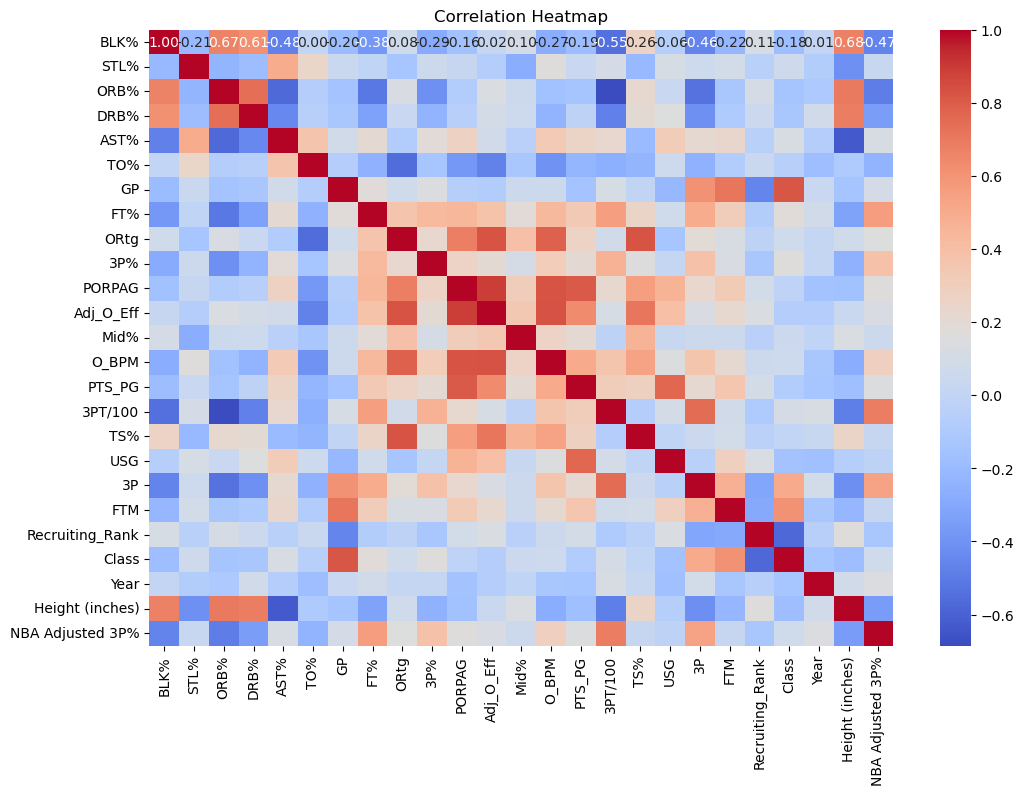

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [143]:
df.drop(columns = 'Player').corr()

BLK%      STL%      ORB%      DRB%      AST%       TO%  \
BLK%              1.000000 -0.205848  0.668683  0.614991 -0.480426  0.001836   
STL%             -0.205848  1.000000 -0.236071 -0.187102  0.498635  0.248818   
ORB%              0.668683 -0.236071  1.000000  0.739171 -0.568619 -0.071608   
DRB%              0.614991 -0.187102  0.739171  1.000000 -0.442885 -0.054791   
AST%             -0.480426  0.498635 -0.568619 -0.442885  1.000000  0.373094   
TO%               0.001836  0.248818 -0.071608 -0.054791  0.373094  1.000000   
GP               -0.195347  0.042661 -0.150843 -0.126910  0.081667 -0.072864   
FT%              -0.375913 -0.009473 -0.513282 -0.335811  0.207413 -0.250253   
ORtg              0.075631 -0.134788  0.124672  0.036894 -0.084469 -0.558907   
3P%              -0.286713  0.052545 -0.411220 -0.240594  0.186149 -0.133018   
PORPAG           -0.158642  0.022823 -0.081092 -0.057698  0.277970 -0.377585   
Adj_O_Eff         0.023173 -0.072761  0.131537  0.092883  0.083973 -0.470877   
Mid%              0.103855 -0.276434  0.055065  0.062385 -0.045910 -0.121418   
O_BPM            -0.274820  0.169101 -0.160477 -0.240563  0.329881 -0.397126   
PTS_PG           -0.186039  0.036895 -0.141162 -0.020793  0.256915 -0.230508   
3PT/100          -0.545221  0.101432 -0.685071 -0.477376  0.229732 -0.268771   
TS%               0.264781 -0.208405  0.218193  0.201946 -0.198816 -0.237359   
USG              -0.060945  0.114605  0.034808  0.152136  0.318867  0.063883   
3P               -0.463985  0.062698 -0.536427 -0.412080  0.212636 -0.253735   
FTM              -0.223446  0.085644 -0.131866 -0.097896  0.232079 -0.080837   
Recruiting_Rank   0.114952 -0.049808  0.107091  0.049269 -0.051254  0.044997   
Class            -0.181757  0.067300 -0.144423 -0.126311  0.118327 -0.054761   
Year              0.011595 -0.079249 -0.110613  0.081098 -0.069481 -0.181206   
Height (inches)   0.677294 -0.410748  0.702620  0.690576 -0.631509 -0.096606   
NBA Adjusted 3P% -0.465042  0.028408 -0.489108 -0.351561  0.123801 -0.239963   

                        GP       FT%      ORtg       3P%  ...   3PT/100  \
BLK%             -0.195347 -0.375913  0.075631 -0.286713  ... -0.545221   
STL%              0.042661 -0.009473 -0.134788  0.052545  ...  0.101432   
ORB%             -0.150843 -0.513282  0.124672 -0.411220  ... -0.685071   
DRB%             -0.126910 -0.335811  0.036894 -0.240594  ... -0.477376   
AST%              0.081667  0.207413 -0.084469  0.186149  ...  0.229732   
TO%              -0.072864 -0.250253 -0.558907 -0.133018  ... -0.268771   
GP                1.000000  0.182004  0.078115  0.138619  ...  0.117765   
FT%               0.182004  1.000000  0.368836  0.426628  ...  0.557416   
ORtg              0.078115  0.368836  1.000000  0.226844  ...  0.082084   
3P%               0.138619  0.426628  0.226844  1.000000  ...  0.466891   
PORPAG           -0.063063  0.442942  0.680919  0.266074  ...  0.220998   
Adj_O_Eff        -0.082809  0.377057  0.826397  0.203471  ...  0.116710   
Mid%              0.058200  0.190351  0.392001  0.108515  ... -0.021206   
O_BPM             0.056034  0.427900  0.783875  0.311956  ...  0.365051   
PTS_PG           -0.151404  0.340559  0.265506  0.209229  ...  0.305614   
3PT/100           0.117765  0.557416  0.082084  0.466891  ...  1.000000   
TS%              -0.004679  0.252034  0.824345  0.159171  ... -0.070838   
USG              -0.216694  0.077971 -0.136613  0.017306  ...  0.094875   
3P                0.605640  0.498129  0.196612  0.385306  ...  0.746507   
FTM               0.713781  0.304871  0.122143  0.126351  ...  0.080056   
Recruiting_Rank  -0.456975 -0.076613 -0.020550 -0.123900  ... -0.098896   
Class             0.821793  0.179699  0.076725  0.164300  ...  0.106679   
Year              0.034268  0.083192  0.015894  0.017683  ...  0.118111   
Height (inches)  -0.142602 -0.324147  0.072523 -0.256662  ... -0.485703   
NBA Adjusted 3P%  0.101901  0.560292  0.154447  0.384465  ...  0.6

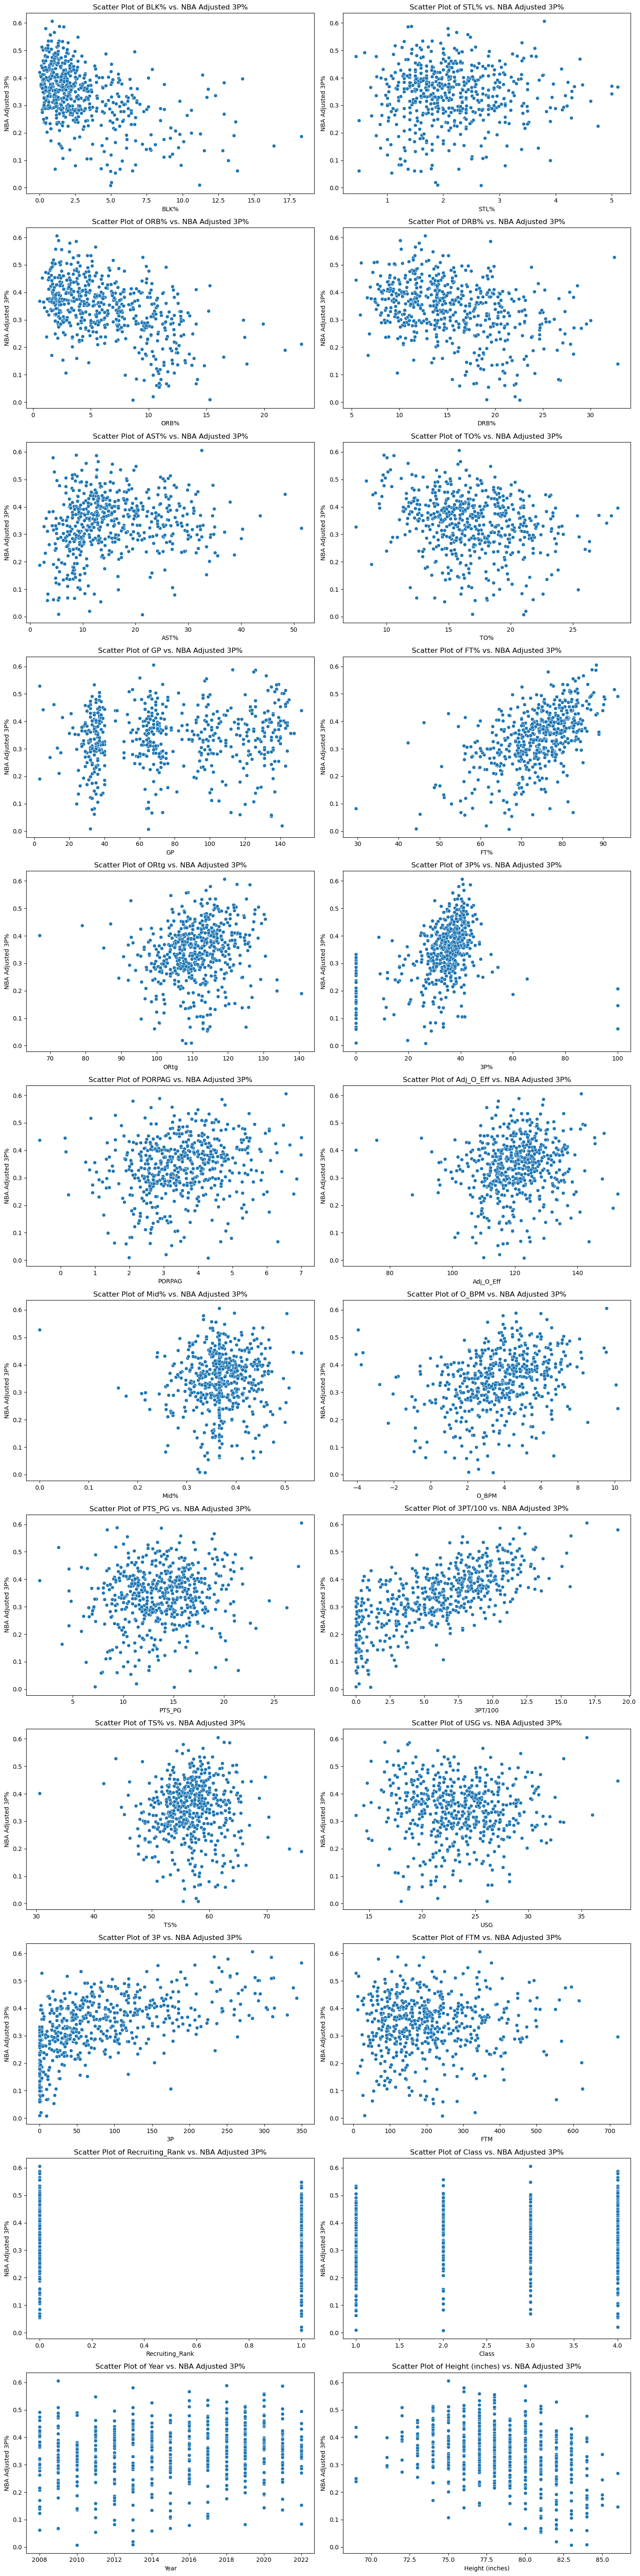

In [144]:
#Create scatter plots for each feature

def create_scatter_plots(df, target_variable):
    # Filter out non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    feature_names = [col for col in numeric_columns if col != target_variable]

    num_features = len(feature_names)
    num_rows = num_features // 2 + num_features % 2  # Calculate the number of rows for subplots
    num_cols = 2  # Two plots per row

    plt.figure(figsize=(15, 5 * num_rows))

    for i, feature in enumerate(feature_names):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.scatterplot(data=df, x=feature, y=target_variable)
        plt.title(f'Scatter Plot of {feature} vs. {target_variable}')
        
        # Calculate axis limits with a buffer
        x_min, x_max = df[feature].min() - 0.05 * (df[feature].max() - df[feature].min()), df[feature].max() + 0.05 * (df[feature].max() - df[feature].min())
        y_min, y_max = df[target_variable].min() - 0.05 * (df[target_variable].max() - df[target_variable].min()), df[target_variable].max() + 0.05 * (df[target_variable].max() - df[target_variable].min())
        
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        plt.xlabel(feature)
        plt.ylabel(target_variable)

    plt.tight_layout()
    plt.show()

# Example usage:
target_variable = 'NBA Adjusted 3P%'  # Replace with your target variable name
create_scatter_plots(df, target_variable)


## OLS Multiple Linear Regression

In [145]:
#Using all of our features for the OLS Model

features = df.drop(columns=['Player', 'Year', 'NBA Adjusted 3P%'])


X = features
y = df['NBA Adjusted 3P%']  # Target variable (dependent variable)

<Axes: >

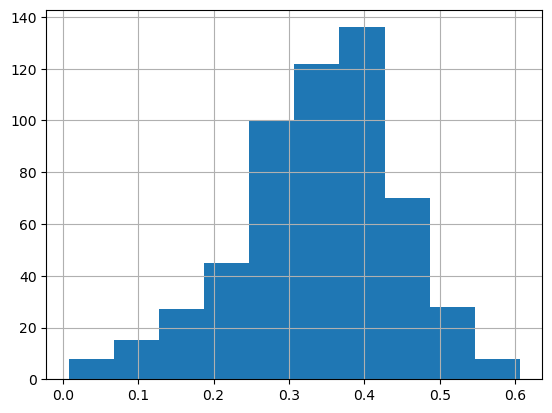

In [146]:
#Our target has a normal distribution

y.hist()

In [147]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))

In [148]:
results = model.fit()

In [149]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       NBA Adjusted 3P%   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     31.24
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.14e-83
Time:                        01:48:10   Log-Likelihood:                 708.50
No. Observations:                 559   AIC:                            -1369.
Df Residuals:                     535   BIC:                            -1265.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1174      0.200     

In [197]:
# Final Feature Selection

final_features = df.drop(columns=['Player', 'Year', 'NBA Adjusted 3P%','ORtg', 'TS%', 'ORB%', 'STL%', 'TO%'])

X = final_features
y = df['NBA Adjusted 3P%'] 

final_features

BLK%       DRB%       AST%   GP        FT%        3P%    PORPAG  \
0    0.098020   8.840594  30.983168   67  73.039593  39.041210  3.997094   
1    2.200000  13.500000   6.800000   39  79.245283  44.654088  3.451450   
2    3.400000  19.300000  13.000000   38  42.222222  35.555556  2.862280   
3    0.697015   8.700000  26.320896  101  80.630261  42.382979  3.601087   
4    2.333333  15.713333   8.980000   46  82.516189  40.453515  3.718164   
..        ...        ...        ...  ...        ...        ...       ...   
554  9.800000  23.200000   4.400000   39  74.324324  47.619048  2.579370   
555  0.800000   9.500000  12.600000   37  69.117647  37.500000  1.840980   
556  3.300000  20.400000   5.800000   32  76.000000  29.411765  4.432070   
557  2.200000  16.400000  16.400000   20  79.591837  29.113924  0.986946   
558  5.800000  18.000000  15.000000   33  64.039409  33.802817  6.774160   

      Adj_O_Eff      Mid%      O_BPM     PTS_PG    3PT/100        USG   3P  \
0    121.921327  0.366359   5.522419  14.554416   9.557913  24.171287  130   
1    126.405000  0.417700   5.878550  10.384600   9.819310  16.900000   71   
2    115.064000  0.257100   2.890220  12.368400   2.350110  23.200000   16   
3    118.915084  0.374307   3.382671  15.776115   7.716124  24.501493  180   
4    119.014733  0.347233   3.444165  16.616640  11.912107  21.620000  119   
..          ...       ...        ...        ...        ...        ...  ...   
554  130.931000  0.508500   2.581490  10.000000   1.747390  24.800000   10   
555  110.171000  0.411800   2.461770   9.432400   8.061630  19.000000   48   
556  127.459000  0.453700   2.735380  16.093800   0.988768  24.100000    5   
557   95.641300  0.360000  -1.892370  10.700000   8.169930  25.800000   23   
558  152.844000  0.490200  10.157100  22.606100   3.897280  28.200000   24   

     FTM  Recruiting_Rank  Class  Height (inches)  
0    194                1      4               74  
1     42                1      1               78  
2     76                1      1               80  
3    311                0      3               73  
4    118                0      2               78  
..   ...              ...    ...              ...  
554  110                1      1               84  
555   47                1      1               77  
556  152                1      1               83  
557   39                1      1               80  
558  130                1      1               79  

[559 rows x 18 columns]

## Modeling

In [151]:
#Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression with sklearn

In [152]:
#Creating a pipeline for our LR model
#With StandardScaler for normalizing our features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LinearRegression())  
])

In [153]:
#Fitting the training data

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the training set
y_train_pred = lr_pipe.predict(X_train)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)

# Compute RMSE
rmse_train = np.sqrt(mse_train)

# Compute R-squared
r2_train = r2_score(y_train, y_train_pred)

# Get training score
training_score = lr_pipe.score(X_train, y_train)

cv_r2_scores = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='r2')  # You can adjust the number of folds as needed

# Compute MSE and RMSE for cross-validation
cv_mse_scores = -cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Average R-squared, MSE, and RMSE for cross-validation
average_cv_r2 = cv_r2_scores.mean()
average_cv_mse = cv_mse_scores.mean()
average_cv_rmse = cv_rmse_scores.mean()

print("R-squared on cross-validation data:", average_cv_r2)
print("MSE on cross-validation data:", average_cv_mse)
print("RMSE on cross-validation data:", average_cv_rmse)

print("MSE on training data:", mse_train)
print("RMSE on training data:", rmse_train)
print("R-squared on training data:", r2_train)

R-squared on cross-validation data: 0.5324724606143015
MSE on cross-validation data: 0.005239338907640088
RMSE on cross-validation data: 0.07231756166514333
MSE on training data: 0.004815840953840395
RMSE on training data: 0.06939626037359935
R-squared on training data: 0.5835275126353965


### Ridge Regression

In [155]:
from sklearn.linear_model import Ridge

# Ridge Regression Pipeline with StandardScaler

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('ridge', Ridge())  
])

In [156]:
#Creating a parameter grid for our GridSearchCV
#For ridge regression, this only includes alpha

ridge_param_grid = {
    'ridge__alpha': [24, 25, 26] 
}

In [157]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [24, 25, 26]},
             scoring='neg_mean_squared_error')

In [158]:
ridge_best_model = grid_search.best_estimator_
ridge_best_params = grid_search.best_params_


# Get predictions on the training data
y_train_pred = ridge_best_model.predict(X_train)

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Get cross-validation scores
cv_scores = cross_val_score(ridge_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores  # Convert negative MSE scores to positive
r2_cv = cross_val_score(ridge_best_model, X_train, y_train, cv=5, scoring='r2')
rmse_cv = np.sqrt(mse_cv)

# Calculate average cross-validation scores
avg_mse_cv = np.mean(mse_cv)
avg_r2_cv = np.mean(r2_cv)
avg_rmse_cv = np.mean(rmse_cv)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print()

print("Training Metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train)
print("RMSE:", rmse_train)
print()

print("Cross-Validation Metrics:")
print("Average MSE:", avg_mse_cv)
print("Average R-squared:", avg_r2_cv)
print("Average RMSE:", avg_rmse_cv)


Best Parameters: {'ridge__alpha': 24}
Best Score: -0.005186950293313628

Training Metrics:
MSE: 0.0048427882253882365
R-squared: 0.5811971206401481
RMSE: 0.06959014459956407

Cross-Validation Metrics:
Average MSE: 0.005186950293313628
Average R-squared: 0.5376918373762842
Average RMSE: 0.07193279969274768


### Random Forest Regression

In [159]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Pipeline

rf_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor()) 
])

In [160]:
# Define hyperparameters grid for GridSearchCV

rf_param_grid = {

    'rf__n_estimators': [175, 180, 185, 190, 200, 210], 
    'rf__max_depth': [9, 10, 11, 12, 13, 14, 15, 16], 
    'rf__min_samples_split': [3, 4, 5, 6, 7],  
    'rf__min_samples_leaf': [1,2,3, 4],  
    'rf__max_features': [.25, .28, .3, .32, .35],  
    'rf__max_leaf_nodes': [None], 
}


In [161]:
#GridSearchCV for Random Forest

grid_search = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose = 1)

#Fit the training data

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [9, 10, 11, 12, 13, 14, 15, 16],
                         'rf__max_features': [0.25, 0.28, 0.3, 0.32, 0.35],
                         'rf__max_leaf_nodes': [None],
                         'rf__min_samples_leaf': [1, 2, 3, 4],
                         'rf__min_samples_split': [3, 4, 5, 6, 7],
                         'rf__n_estimators': [175, 180, 185, 190, 200, 210]},
             scoring='neg_mean_squared_error', verbose=1)

In [162]:

# Get best model and its metrics
rf_best_model = grid_search.best_estimator_
rf_best_params = grid_search.best_params_
rf_best_score = -grid_search.best_score_

# Calculate training set metrics using best_model
y_train_pred = rf_best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Get cross-validation scores
cv_scores_mse = -cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rmse = np.sqrt(cv_scores_mse)
cv_scores_r2 = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='r2')

# Calculate average cross-validation scores
avg_cv_score_mse = cv_scores_mse.mean()
avg_cv_score_rmse = cv_scores_rmse.mean()
avg_cv_score_r2 = cv_scores_r2.mean()

print("Training Set Metrics:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("\nBest Model:")
print("Best Parameters:", rf_best_params)
print("Best Score (MSE):", rf_best_score)
print("\nCross-Validation Scores:")
print("Average CV MSE Score:", avg_cv_score_mse)
print("Average CV RMSE Score:", avg_cv_score_rmse)
print("Average CV R-squared Score:", avg_cv_score_r2)

Training Set Metrics:
MSE: 0.002329712004614803
RMSE: 0.048267090285356994
R-squared: 0.7985272016445293

Best Model:
Best Parameters: {'rf__max_depth': 10, 'rf__max_features': 0.3, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 4, 'rf__n_estimators': 175}
Best Score (MSE): 0.005560133051335044

Cross-Validation Scores:
Average CV MSE Score: 0.005703004310113408
Average CV RMSE Score: 0.07530966592753906
Average CV R-squared Score: 0.4950611659233187


### Dummy Model

I will now create a dummy model to start to compare each of my model's cross validation results to. The dummy model sets a foundational level of accuracy against which the predictive capabilities of more sophisticated models can be compared. The rationale behind using such a baseline is to provide context for the performance of our predictive models, as any model should aim to surpass this baseline to show its value.

In [163]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)  

y_pred_dummy = dummy_model.predict(X_test)


mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_train = r2_score(y_test, y_pred_dummy)
print(f'Dummy Model r-squared: {r2_train}')

print("Dummy Model MSE:", mse_dummy)
print("Dummy Model RMSE:", rmse_dummy)

Dummy Model r-squared: -0.04332316274173209
Dummy Model MSE: 0.008199145639350312
Dummy Model RMSE: 0.09054913384097228


### Support Vector Regression

In [164]:
from sklearn.svm import SVR

In [165]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR()) 
])


In [166]:
svm_param_grid = {
    'svm__kernel': ['linear', 'rbf'], 
    'svm__C': [.005, .0051, .0052, .0053, .0054, .0055, .0056,.0057, .0058, .0059, .006 ],
    'svm__epsilon': [0.015,.016, .017, 0.018, .019, 0.02, .021, 0.022], 
    'svm__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
    'svm__degree': [1,2,3, 4, 5], 
}


In [167]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5280 candidates, totalling 26400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVR())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.005, 0.0051, 0.0052, 0.0053, 0.0054,
                                    0.0055, 0.0056, 0.0057, 0.0058, 0.0059,
                                    0.006],
                         'svm__degree': [1, 2, 3, 4, 5],
                         'svm__epsilon': [0.015, 0.016, 0.017, 0.018, 0.019,
                                          0.02, 0.021, 0.022],
                         'svm__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [168]:
# Get the best model and parameters
svr_best_model = grid_search.best_estimator_
svr_best_params = grid_search.best_params_
svr_best_score = grid_search.best_score_


# Predict on the training set
y_pred_train = svr_best_model.predict(X_train)

# Evaluate performance on the training set
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mse_train = mean_squared_error(y_train, y_pred_train)

# Cross-validate
cv_scores = cross_val_score(svr_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
average_cv_rmse = np.sqrt(-cv_scores.mean())
average_cv_mse = -cv_scores.mean()
average_cv_r2 = cross_val_score(svr_best_model, X_train, y_train, cv=5, scoring='r2').mean()

# Print results
print("Best Model:", svr_best_model)
print("Best Parameters:", svr_best_params)
print("Best Score (MSE):", svr_best_score)
print("\nPerformance on Training Set:")
print("R-squared:", r2_train)
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("\nCross-Validation Scores:")
print("Average CV MSE Score:", average_cv_mse)
print("Average CV RMSE Score:", average_cv_rmse)
print("Average CV R-squared Score:", average_cv_r2)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVR(C=0.0054, degree=1, epsilon=0.017, kernel='linear'))])
Best Parameters: {'svm__C': 0.0054, 'svm__degree': 1, 'svm__epsilon': 0.017, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Score (MSE): -0.005165379134781428

Performance on Training Set:
R-squared: 0.5791074446188258
RMSE: 0.0697635434887951
MSE: 0.004866952000113005

Cross-Validation Scores:
Average CV MSE Score: 0.005165379134781428
Average CV RMSE Score: 0.07187057210556647
Average CV R-squared Score: 0.539838202700756


### XGBoost Regressor

In [169]:
from xgboost import XGBRegressor

In [170]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor() )
])

In [171]:
xgb_param_grid = {
    'xgb__learning_rate': [ 0.05, .052, 0.055, .058, .6, ],  
    'xgb__max_depth': [None, 1, 2, 5],
    'xgb__n_estimators': [140, 145, 150, 155, 160],
    'xgb__booster': ['gblinear'],  
    'xgb__reg_alpha': [0, .005], 
    'xgb__reg_lambda': [0, 0.01, .015, .02, .025]   
}


In [172]:
# Perform GridSearchCV
grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=Non...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__booster': ['gblinear'],
                         'xgb__learning_rate': [0.05, 0.052, 0.055, 0.058, 0.6],
                         'xgb__max_depth': [None, 1, 2, 5],
                         'xgb__n_estimators': [140, 145, 150, 155, 160],
                         'xgb__reg_alpha': [0, 0.005],
                         'xgb__reg_lambda': [0, 0.01, 0.015, 0.02, 0.025]},
             scoring='neg_mean_squared_error', verbose=1)

In [173]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Fit the best model to the training data
best_xgb_model.fit(X_train, y_train)

# Training scores
y_train_pred = best_xgb_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mse_train = mean_squared_error(y_train, y_train_pred)

# Print training scores
print("Training R^2:", r2_train)
print("Training RMSE:", rmse_train)
print("Training MSE:", mse_train)

cv_scores_r2 = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_rmse = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_rmse  # convert to positive values

# Compute the average scores
avg_cv_r2 = np.mean(cv_scores_r2)
avg_cv_rmse = np.sqrt(np.mean(cv_scores_mse))  # compute RMSE from MSE
avg_cv_mse = np.mean(cv_scores_mse)

# Print the average scores
print("Average CV R^2:", avg_cv_r2)
print("Average CV RMSE:", avg_cv_rmse)
print("Average CV MSE:", avg_cv_mse)

Best Parameters: {'xgb__booster': 'gblinear', 'xgb__learning_rate': 0.058, 'xgb__max_depth': None, 'xgb__n_estimators': 140, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 0.02}
Best Score (MSE): -0.005177493110474425
Training R^2: 0.5809689700134824
Training RMSE: 0.06960909727890806
Training MSE: 0.004845426423984485
Average CV R^2: 0.5384383850635859
Average CV RMSE: 0.07195385515662309
Average CV MSE: 0.005177357271900294


### AdaBoost Regressor

In [174]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor()

ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('ada', AdaBoostRegressor(estimator=base_estimator)) 
])

In [175]:
ada_param_grid = {
    'ada__n_estimators': [235], 
    'ada__learning_rate': [0.5, .52, .55],  
    'ada__loss': ['exponential'], 
    'ada__base_estimator__max_depth': [10, 11, 12, 13, 14], 
    'ada__base_estimator__min_samples_split': [8, 9, 10], 
    'ada__base_estimator__min_samples_leaf': [10, 11, 12, 13],
    'ada__base_estimator__max_features': [.2, 0.21, .22],
    'ada__base_estimator__max_leaf_nodes': [None, 30],  
}


In [176]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_pipeline, ada_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs = -1)
grid_search.fit(X_train, y_train)  

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/Users/jayiraj/miniconda3/envs/capstone/lib/python3.11/site-packages/sklearn/base.py:262: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  valid_params[key].set_params(**sub_params)
/Users/jayiraj/miniconda3/envs/capstone/lib/python3.11/site-packages/sklearn/base.py:262: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  valid_params[key].set_params(**sub_params)
/Users/jayiraj/miniconda3/envs/capstone/lib/python3.11/site-packages/sklearn/base.py:262: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  valid_params[key].set_params(**sub_params)
/Users/jayiraj/miniconda3/envs/capstone/lib/python3.11/site-packages/sklearn/base.py:262: FutureWarning: Parameter 'base_estimator' o

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor()))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__max_depth': [10, 11, 12, 13, 14],
                         'ada__base_estimator__max_features': [0.2, 0.21, 0.22],
                         'ada__base_estimator__max_leaf_nodes': [None, 30],
                         'ada__base_estimator__min_samples_leaf': [10, 11, 12,
                                                                   13],
                         'ada__base_estimator__min_samples_split': [8, 9, 10],
                         'ada__learning_rate': [0.5, 0.52, 0.55],
                         'ada__loss': ['exponential'],
                         'ada__n_estimators': [235]},
             scoring='neg_mean_squared_error', verbose=1)

In [177]:
# Get the best model and its parameters
ada_best_model = grid_search.best_estimator_
ada_best_params = grid_search.best_params_

# Get training scores
y_train_pred = ada_best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Get cross-validation scores
cv_rmse = np.sqrt(-grid_search.best_score_)
cv_mse = -grid_search.best_score_
cv_r2 = cross_val_score(ada_best_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print("Best Model:", ada_best_model)
print("Best Parameters:", ada_best_params)
print("Training RMSE:", train_rmse)
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Average CV RMSE:", cv_rmse)
print("Average CV MSE:", cv_mse)
print("Average CV R^2:", np.mean(cv_r2))

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('ada',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                                   max_features=0.2,
                                                                   max_leaf_nodes=30,
                                                                   min_samples_leaf=10,
                                                                   min_samples_split=10),
                                   learning_rate=0.55, loss='exponential',
                                   n_estimators=235))])
Best Parameters: {'ada__base_estimator__max_depth': 10, 'ada__base_estimator__max_features': 0.2, 'ada__base_estimator__max_leaf_nodes': 30, 'ada__base_estimator__min_samples_leaf': 10, 'ada__base_estimator__min_samples_split': 10, 'ada__learning_rate': 0.55, 'ada__loss': 'exponential', 'ada__n_estimators': 235}
Training RMSE: 0.043290015723959525
Trainin

In [199]:
# Predict on the test set
y_pred_test = svr_best_model.predict(X_test)

# Evaluate performance on the test set
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mse_test = mean_squared_error(y_test, y_pred_test)

# Print results for the test set
print("SVR Performance on Test Set:")
print("R-squared:", r2_test)
print("RMSE:", rmse_test)
#print("MSE:", mse_test)

SVR Performance on Test Set:
R-squared: 0.4879032797541556
RMSE: 0.06343820309154603


## Feature Importance

Feature Importance in the SVR Model was assessed through Coefficent Magnitude and Perumtation Feature performance. Here are the results:

#### Coefficient Magnitude

In [186]:
if svr_best_params['svm__kernel'] == 'linear':
    # Extract feature coefficients
    feature_importances = svr_best_model.named_steps['svm'].coef_.flatten()

# Map feature names to their importances
feature_importance_dict = dict(zip(X, feature_importances))

# Optionally, sort the features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the feature names with their importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

FT%: 0.034533023326483
3PT/100: 0.027536947695741193
3P: 0.01993215333828223
DRB%: 0.009659738875711048
O_BPM: 0.009018886182536986
USG: 0.008622544353773633
GP: 0.007693239325899207
Mid%: 0.0036200935620611446
Adj_O_Eff: 0.0032497966488876013
3P%: 0.0016614305901028594
PTS_PG: -0.004890733982940395
Height (inches): -0.008363606840430703
Recruiting_Rank: -0.009344805495273167
AST%: -0.010313309385744766
Class: -0.01161882043736364
PORPAG: -0.012584640164021945
BLK%: -0.025249319067784944
FTM: -0.027194029859015735


#### Permutation Feature Importance

In [189]:
from sklearn.inspection import permutation_importance

# Perform permutation feature importance
perm_importance = permutation_importance(svr_best_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get importances
importances = perm_importance.importances_mean

# Assuming you have a list of feature names matching the columns of X_test
feature_names = X_test.columns

# Pair each feature name with its corresponding importance and sort them by importance
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for name, importance in sorted_features:
    print(f"{name}: {importance}")


FT%: 0.22316250605480317
FTM: 0.13949902344175338
3PT/100: 0.10628608880130062
3P: 0.05311784052192585
AST%: 0.05121339633540147
BLK%: 0.04791434769352379
PORPAG: 0.03898497671908293
DRB%: 0.03228888973788697
Class: 0.023707713116709973
USG: 0.014394911141562902
GP: 0.014197890877684183
Recruiting_Rank: 0.012234989099977434
PTS_PG: 0.011123898341862386
O_BPM: 0.010749679870887315
Adj_O_Eff: 0.004686645814494761
3P%: 0.0010627121699201213
Height (inches): -0.0005374327879915393
Mid%: -0.0011545838740567767
[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[01:56:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_16754577806

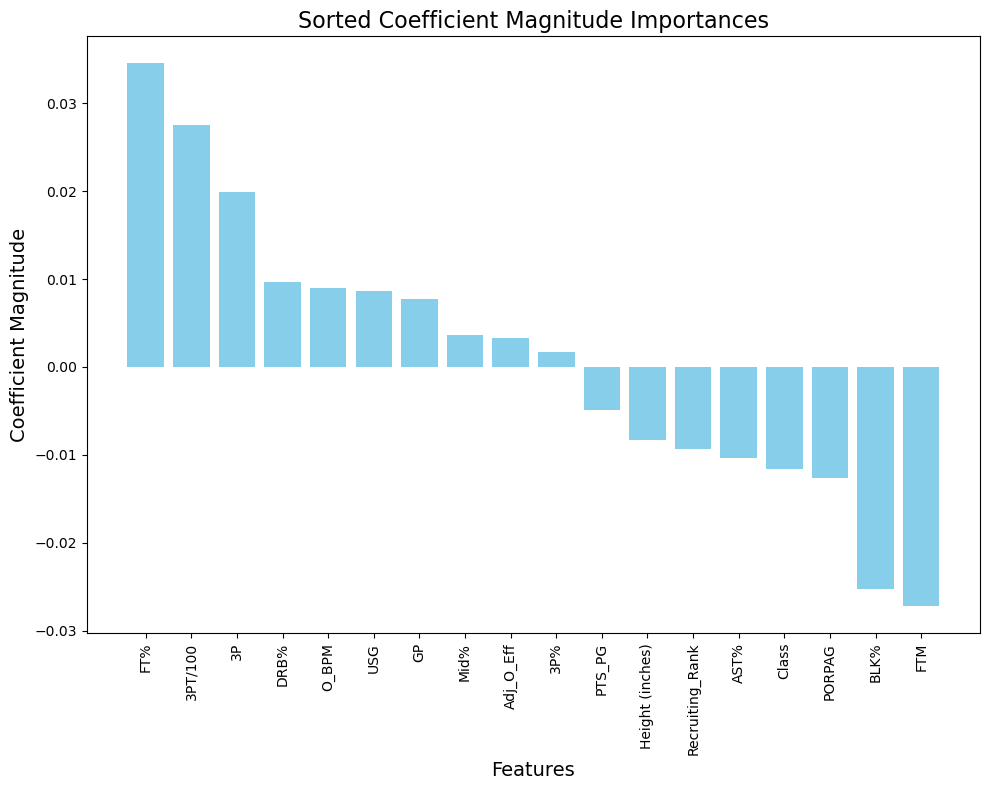

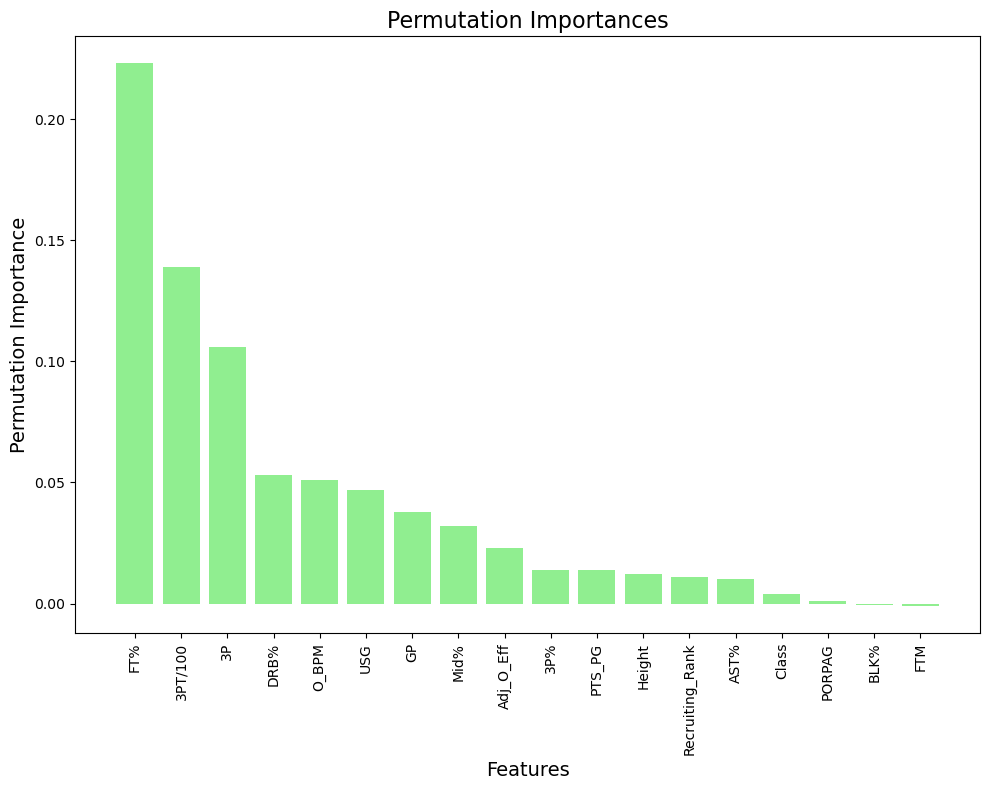

In [191]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

sorted_feature_importance = [('FT%', 0.034533023326483), ('3PT/100', 0.027536947695741193), ('3P', 0.01993215333828223), ('DRB%', 0.009659738875711048), ('O_BPM', 0.009018886182536986), ('USG', 0.008622544353773633), ('GP', 0.007693239325899207), ('Mid%', 0.0036200935620611446), ('Adj_O_Eff', 0.0032497966488876013), ('3P%', 0.0016614305901028594), ('PTS_PG', -0.004890733982940395), ('Height (inches)', -0.008363606840430703), ('Recruiting_Rank', -0.009344805495273167), ('AST%', -0.010313309385744766), ('Class', -0.01161882043736364), ('PORPAG', -0.012584640164021945), ('BLK%', -0.025249319067784944), ('FTM', -0.027194029859015735)]

# Separate the feature names and their importances for plotting
features, importances = zip(*sorted_feature_importance)

# Create the plot
plt.figure(figsize=(10, 8))
indexes = range(len(features))
plt.bar(indexes, importances, color='skyblue')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Magnitude', fontsize=14)
plt.title('Sorted Coefficient Magnitude Importances', fontsize=16)
plt.xticks(ticks=indexes, labels=features, rotation=90)
plt.tight_layout()
plt.show()

feature_names = ['FT%', '3PT/100', '3P', 'DRB%', 'O_BPM', 'USG', 'GP', 'Mid%', 'Adj_O_Eff', '3P%', 'PTS_PG', 'Height', 'Recruiting_Rank', 'AST%', 'Class', 'PORPAG', 'BLK%', 'FTM']
coef_importances = [-0.025, 0.009, -0.010, 0.007, 0.034, 0.001, -0.012, 0.003, 0.003, 0.009, -0.004, 0.027, 0.008, 0.019, -0.027, -0.009, -0.011, -0.008]
perm_importances = [0.223, 0.139, 0.106, 0.053, 0.051, 0.047, 0.038, 0.032, 0.023, 0.014, 0.014, 0.012, 0.011, 0.010, 0.004, 0.001, -0.0005, -0.001]

# Plot for Permutation Importances
plt.figure(figsize=(10, 8))
plt.bar(indexes, perm_importances, color='lightgreen')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Permutation Importances', fontsize=16)
plt.xticks(ticks=indexes, labels=feature_names, rotation=90)
plt.tight_layout()
plt.show()


##### Conclusions

When assessing the coefficient magnitude and the permutation feature importance, FT% (free throw percentage), 3PT/100 (Three-Pointers per 100 Possessions), 3P (three pointers made) are consistently important predictors of NBA three-point shooting skill. This aligns with the previous discussion of three-point percentage alone not being as indiciative of three-point shooting skill as it might seem, as some players may be taking a higher volume of shots per possession and also may be taking more difficult shots as a byproduct of this. Additonally, players generally dont take that large a sample of three pointers during their college careers, so college three-point percentage is quite susceptible to noise, making it less reliable for predicting future performance.

Free throw percentage (FT%), on the other hand, can be a better predictor for a few reasons. First, it shows how well a player can shoot when conditions are controlled - no defenders, same distance every time. So is also arguably as good at, if not better at, indiciating a player's overall 'shooting touch' than three-point percentage. Another factor is players usually take many more free throws in college than three pointers, and free throws are less prone to variance in general because they are higher-percentage shots, so this gives us a larger sample to work with and is a more reliable measure of a player’s shooting ability.

The stat 3PT/100 is also useful. It tells us not just how many threes a player makes, but how willing they are to take them. Good shooters are likely to shoot more threes, both because they themselves have been considered good shooters in the past (high school and team practices) and because their coaches set up plays for them to shoot from distance. Also, if a player is shooting more threes per possession, they’re probably taking more difficult shots too, rather than only shooting when they find themselves wide open. And it is also possibly true that shooting more often in games might indicate and/or lead to better shooting improvement and developement in the future. 

Overall, these findings show that how often players shoot and their free throw percentages might give us better clues about their future NBA three-point shooting than just their college three-point shooting percentage. This approach recognizes that predicting shooting skill is about more than just the percentage of three pointers a player makes; it's also about their overall shooting habits and how they fit into the game.
